In [1]:
import warnings
warnings.filterwarnings('ignore')
import importlib

import numpy as np
# import wlcstat.wlc_copoly as wlc_copoly
# import wlcstat.wlcstruc as wlcstruc

import sys
sys.path.append("./vertex_subroutines")
from GAMcalc import *  # Code for calculating vertex functions
import propagator  # propagator object used to store pre-calculated values
import wignerD as wd # wigner D object used to store pre-calculated values

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

from scipy.interpolate import interp1d
from scipy import optimize
from scipy.optimize import basinhopping

from gaus_vertex_pd_mix import *

import time

pset=propagator.prop_set(nlam=10) 
wigset = wd.wigner_d_vals()

In [2]:
# double chexk gaus_vertex_pd_mix (any errors/typos?)
# reproduce datong dings paper- not as far in strong segregation regime

# asymmetric diblocks; same length

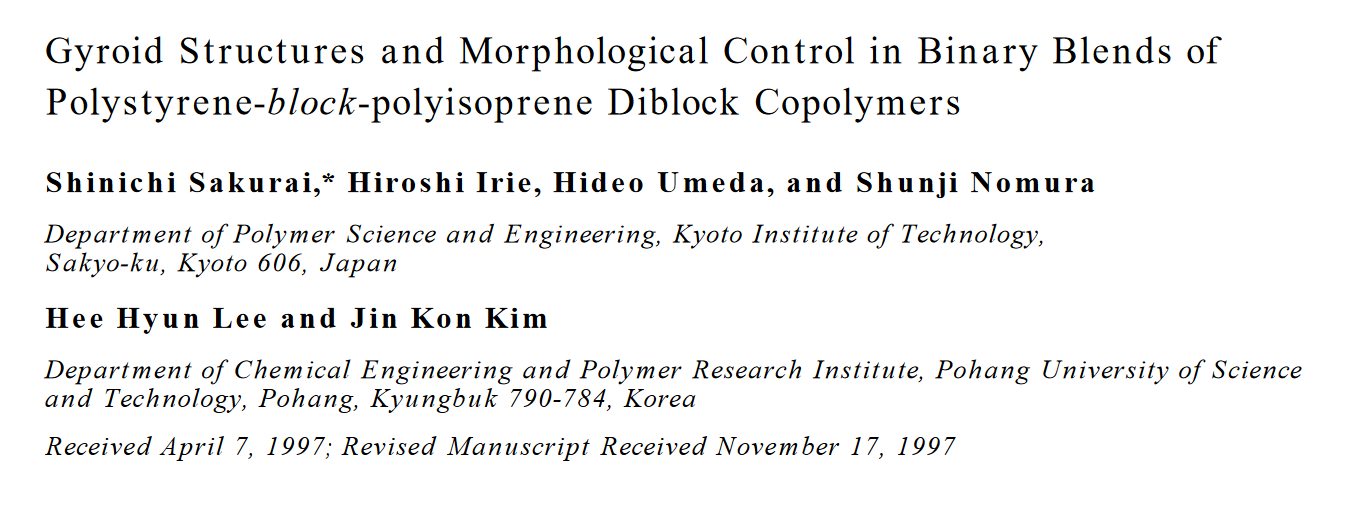

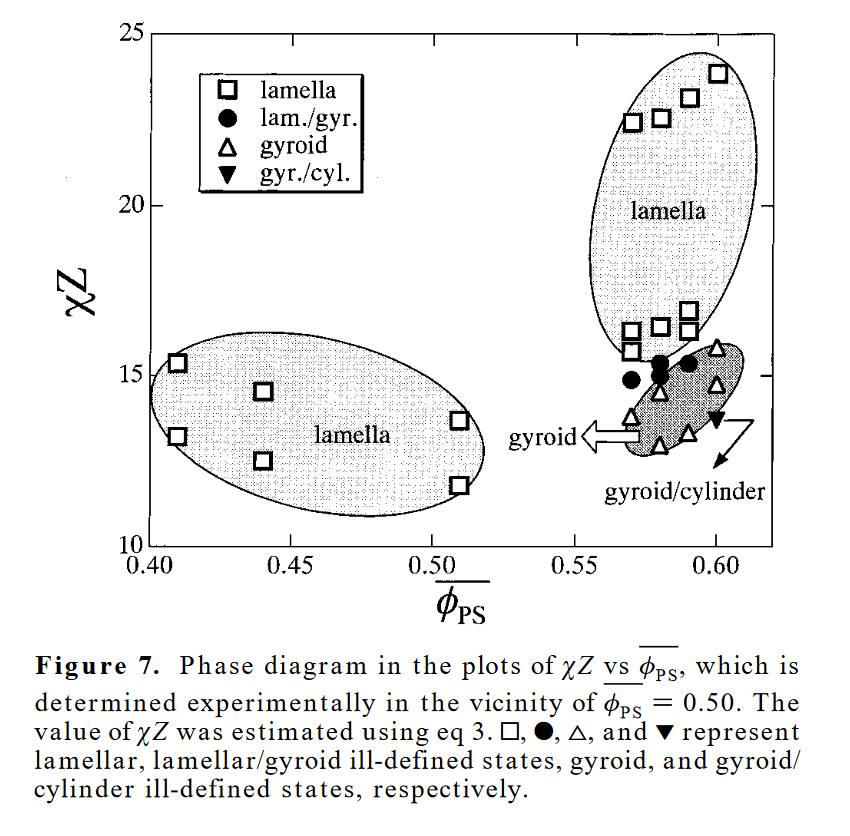

In [ ]:
dens_1 = 0.6
dens_1 = 0.1
dens_2 = 1 - dens_1

fa_1= 0.26
fa_2 = 0.65

phi_bar = fa_1 * dens_1 + fa_2 * dens_2
phi_bar

In [75]:
.65 * 20

13.0

In [76]:
13/20

0.65

In [99]:
%%time
# ginzberg criterion, Aksimentiev gyroid (Phase behavior of gradient copolymers Aleksij Aksimentiev; Robert Hołyst)
N = 10000
M = 20
M_arr = [M, M]
N_m = N / M
b=1
chi_array = np.arange(10, 25.1, 0.1)/N

fa_1 = 0.25
poly_1 = [0]*int(M*fa_1) + [1]*int(M*(1-fa_1))

fa_2 = 0.65
poly_2 =  [0]*int(M*fa_2) + [1]*int(M*(1-fa_2))

poly_mat = [poly_1, poly_2]
dens_1_arr = np.arange(0.1, 0.6, 0.05)

lam_pnts = np.array([])
cyl_pnts = np.array([])
bcc_pnts = np.array([])
gyr_pnts = np.array([])
sq_cyl_pnts = np.array([])
sim_cub_pnts = np.array([])
fcc_pnts = np.array([])
dis_pnts = np.array([])
macro_pnts = np.array([])

for ds1 in dens_1_arr:
    dens = [ds1, 1-ds1]
    mx = Mix(poly_mat, dens, M_arr, N_m, b)
    
    phi_bar = fa_1 * ds1 + fa_2 * (1-ds1)

    q_star = mx.q_star
    q_star = q_star[0]

#     if q_star <= 0.01:
    if q_star <= 1/np.sqrt(mx.N*(mx.b**2)):
        #only disorderd or macrophase separation possible
        for CHI in chi_array:
            G2 = gamma2_E(mx, q_star, CHI)
            point = np.array([ds, CHI*N_l])
            if G2 < 0:
                macro_pnts = np.append(macro_pnts, point)
            elif G2 >= 0:
                dis_pnts = np.append(dis_pnts, point)
    else:
        lam_q = q_star*np.array([1, 0, 0])

        cyl_q1 = q_star*np.array([1, 0, 0])
        cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
        cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
        cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])

        bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
        bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
        bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
        bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
        bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
        bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])

        sq_6 = (1/np.sqrt(6)) * q_star
        gyr_q1 = sq_6*np.array([-1, 2, 1])
        gyr_q2 = sq_6*np.array([2, 1, -1])
        gyr_q3 = sq_6*np.array([1, -1, 2])
        gyr_q4 = sq_6*np.array([2, -1, -1])
        gyr_q5 = sq_6*np.array([-1, 2, -1])
        gyr_q6 = sq_6*np.array([-1, -1, 2])

        gyr_q7 = sq_6*np.array([2, 1, 1])
        gyr_q8 = sq_6*np.array([1, 2, 1])
        gyr_q9 = sq_6*np.array([1, 1, 2])
        gyr_q10 = sq_6*np.array([2, -1, 1])
        gyr_q11 = sq_6*np.array([1, 2, -1])
        gyr_q12 = sq_6*np.array([-1, 1, 2])
        
        gyr_q1_2 = sq_6*np.array([2, 2, 0])
        gyr_q2_2 = sq_6*np.array([2, 0, 2])
        gyr_q3_2 = sq_6*np.array([0, 2, 2])
        gyr_q4_2 = sq_6*np.array([-2, 2, 0])
        gyr_q5_2 = sq_6*np.array([-2, 0, 2])
        gyr_q6_2 = sq_6*np.array([0, -2, 2])

        sq_cyl_q1 = q_star * np.array([1,0,0])
        sq_cyl_q2 = q_star * np.array([0,1,0])

        sim_cub_q1 = q_star * np.array([1,0,0])
        sim_cub_q2 = q_star * np.array([0,1,0])
        sim_cub_q3 = q_star * np.array([0,0,1])

        fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
        fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
        fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
        fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])


        G3 = gamma3_E(mx, cyl_qs) # all g3s are eqivlaent
        lam_g3 = 0
        cyl_g3 = (1/6) * (1/(3*np.sqrt(3))) * 12 * G3
        bcc_g3 = -(4/(3*np.sqrt(6))) * G3 #* gamma3_E(mx, np.array([bcc_q6, bcc_q3, -bcc_q1]))
        gyr_g3 = -(1/6)  * (1/(12*np.sqrt(12))) * 48  * G3 #* gamma3_E(mx, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
        gyr_g3_2 = (1/6) * (1/(6*np.sqrt(6))) * 48 * gamma3_E(mx, np.array([gyr_q1_2, -gyr_q3_2, gyr_q5_2]))
        gyr_g3_mix = -(1/6) * (1/(12*np.sqrt(6))) * 24 * gamma3_E(mx, np.array([gyr_q7, -gyr_q4, -gyr_q3_2])) #prevously 72 ??!!

        sq_cyl_g3 = 0
        sim_cub_g3 = 0
        fcc_g3 = 0

        G4_00 = gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
        lam_g4 = (1/24) * (6) * (1) * G4_00#gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
        cyl_g4 = (1/12)* (G4_00 + \
                  4*gamma4_E(mx, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
        bcc_g4 = (1/24)* (G4_00 \
                         + 8*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                         + 2*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                         + 4*gamma4_E(mx, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
        gyr_g4 = (1/24)* (1/(12*12)) * (72*G4_00 + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q8, -gyr_q8])) + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q10, -gyr_q10])) + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q11, -gyr_q11])) + \
                           144*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q4, -gyr_q4])) + \
                           576*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q12, -gyr_q12])) + \
                           -288*gamma4_E(mx, np.array([gyr_q1, gyr_q4, -gyr_q10, -gyr_q5])) + \
                           144*gamma4_E(mx, np.array([gyr_q7, -gyr_q2, gyr_q4, -gyr_q10])) + \
                           -288*gamma4_E(mx, np.array([gyr_q1, -gyr_q5, -gyr_q7, gyr_q2])))
        gyr_g4_2 = (1/24) * (1/36) * (36*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q1_2, -gyr_q1_2])) + \
                           288*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q2_2, -gyr_q2_2])) + \
                           72*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q4_2, -gyr_q4_2])) + \
                           144*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q2_2, gyr_q5_2, -gyr_q4_2])))
        gyr_g4_mix1 = (1/6) * (1/24) * (1/(6*12)) * (576*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q4_2, -gyr_q4_2])) + \
                               576*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q1_2, -gyr_q1_2])) + \
                               -576*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, gyr_q11, -gyr_q1_2])) + \
                               288*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, gyr_q1, -gyr_q3_2])) + \
                               -576*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q6_2, -gyr_q11])) + \
                               288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q6_2, -gyr_q6_2])) + \
                               288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q3_2, -gyr_q3_2])))

        gyr_g4_mix2 = (1/4) * (1/24) * (1/(12*np.sqrt(12)*np.sqrt(6))) * (1152*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
                               -576*gamma4_E(mx, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
                               -576*gamma4_E(mx, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))
        
        G4_90deg = gamma4_E(mx, np.array([sq_cyl_q1 , -sq_cyl_q1 , sq_cyl_q2 , -sq_cyl_q2 ]))
        sq_cyl_g4 = (1/24) * (1/4) * (12*G4_00 + \
                                      24*G4_90deg)
        sim_cub_g4 = (1/24) * (1/9) * (18*G4_00+ \
                                       72*G4_90deg)
        fcc_g4 = (1/24) * (1/16) * (24*G4_00\
                                    + 144*gamma4_E(mx, np.array([fcc_q1, -fcc_q1, fcc_q2, -fcc_q2]))\
                                    - 48*gamma4_E(mx, np.array([-fcc_q1, fcc_q2, fcc_q3, fcc_q4])))
        
        for CHI in chi_array:
            lam_g2 = (1/2) * 2 * (1) * gamma2_E(mx, q_star, CHI)                
            cyl_g2 = lam_g2#(1/2) * 6 * (1/3) * gamma2_E(mx, q_star, CHI)
            bcc_g2 = lam_g2#(1/2) * 12 * (1/6) * gamma2_E(mx, q_star, CHI)
            gyr_g2 = lam_g2
            gyr_g2_2 = (1/2) * 12 * (1/6) * gamma2_E(mx, np.sqrt(4/3)*q_star, CHI)    
            sq_cyl_g2 = lam_g2#(1/2) * (1/2) * 4 * gamma2_E(mx, q_star, CHI)
            sim_cub_g2 = lam_g2
            fcc_g2 = lam_g2

            if gyr_g3>0:
                gyr_g3*= -1
            if gyr_g3_2>0:
                gyr_g3_2*= -1
            if gyr_g3_mix<0:
                gyr_g3_mix*= -1

            amp_g1, amp_g2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
                                                     amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
                                                     amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
                                                     amps[0]**3 * amps[1] * gyr_g4_mix2), \
                                  [0,0], disp=False)

            gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4 +\
                    amp_g2**2 * gyr_g2_2 + amp_g2**3 * gyr_g3_2 + amp_g2**4 * gyr_g4_2 + \
                    amp_g1**2 * amp_g2 * gyr_g3_mix + amp_g1**2 * amp_g2**2 * gyr_g4_mix1 +\
                    amp_g1**3 * amp_g2 * gyr_g4_mix2

            amp_l1 = np.real((-3*lam_g3 - np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
            amp_l2 = np.real((-3*lam_g3 + np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
            amp_c1 = np.real((-3*cyl_g3 - np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
            amp_c2 = np.real((-3*cyl_g3 + np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
            amp_bcc1 = np.real((-3*bcc_g3 - np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
            amp_bcc2 = np.real((-3*bcc_g3 + np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
            amp_g1 = np.real((-3*gyr_g3 - np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
            amp_g2 = np.real((-3*gyr_g3 + np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
            amp_sq_c1 = np.real((-3*sq_cyl_g3 - np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
            amp_sq_c2 = np.real((-3*sq_cyl_g3 + np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
            amp_sim_cub1 = np.real((-3*sim_cub_g3 - np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
            amp_sim_cub2 = np.real((-3*sim_cub_g3 + np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
            amp_fcc1 = np.real((-3*fcc_g3 - np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))
            amp_fcc2 = np.real((-3*fcc_g3 + np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))

            lamF_1 = np.real(amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 )
            cylF_1 = np.real(amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 )
            bccF_1 = np.real(amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4)
            gyrF_1 = np.real(amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4)
            sq_cylF_1 = np.real(amp_sq_c1**2 * sq_cyl_g2 + amp_sq_c1**3 * sq_cyl_g3 + amp_sq_c1**4 * sq_cyl_g4 )
            sim_cubF_1 = np.real(amp_sim_cub1**2 * sim_cub_g2 + amp_sim_cub1**3 * sim_cub_g3 + amp_sim_cub1**4 * sim_cub_g4 )
            fccF_1 = np.real(amp_fcc1**2 * fcc_g2 + amp_fcc1**3 * fcc_g3 + amp_fcc1**4 * fcc_g4)

            lamF_2 = np.real(amp_l2**2 * lam_g2 + amp_l2**3 * lam_g3 + amp_l2**4 * lam_g4)
            cylF_2 = np.real(amp_c2**2 * cyl_g2 + amp_c2**3 * cyl_g3 + amp_c2**4 * cyl_g4 )
            bccF_2 = np.real(amp_bcc2**2 * bcc_g2 + amp_bcc2**3 * bcc_g3 + amp_bcc2**4 * bcc_g4)
            gyrF_2 = np.real(amp_g2**2 * gyr_g2 + amp_g2**3 * gyr_g3 + amp_g2**4 * gyr_g4)
            sq_cylF_2 = np.real(amp_sq_c2**2 * sq_cyl_g2 + amp_sq_c2**3 * sq_cyl_g3 + amp_sq_c2**4 * sq_cyl_g4)
            sim_cubF_2 = np.real(amp_sim_cub2**2 * sim_cub_g2 + amp_sim_cub2**3 * sim_cub_g3 + amp_sim_cub2**4 * sim_cub_g4 )
            fccF_2 = np.real(amp_fcc2**2 * fcc_g2 + amp_fcc2**3 * fcc_g3 + amp_fcc2**4 * fcc_g4)

            lamF = min(lamF_1, lamF_2)
            cylF = min(cylF_1, cylF_2)
            bccF = min(bccF_1, bccF_2)
            gyrF = min(gyrF_1, gyrF_2)
            sq_cylF = min(sq_cylF_1, sq_cylF_2)
            sim_cubF = min(sim_cubF_1, sim_cubF_2)
            fccF = min(fccF_1, fccF_2)
            
            point = np.array([phi_bar, CHI*mx.N])

            minF = min([lamF, cylF, bccF, gyrF, sq_cylF, sim_cubF, fccF])
    #         print(lamF)
            if minF >= 0:
                dis_pnts = np.append(dis_pnts, point)
            elif minF == lamF:
                lam_pnts = np.append(lam_pnts, point) 
            elif minF == cylF:
                cyl_pnts = np.append(cyl_pnts, point)
            elif minF == bccF:
                bcc_pnts = np.append(bcc_pnts, point)
            elif minF == gyrF:
                gyr_pnts = np.append(gyr_pnts, point)
            elif minF == sq_cylF:
                sq_cyl_pnts = np.append(sq_cyl_pnts, point)
            elif minF == sim_cubF:
                sim_cub_pnts = np.append(sim_cub_pnts, point)
            elif minF == fccF:
                fcc_pnts = np.append(fcc_pnts, point)
            else:
                raise Exception("error in min F phase assignment")
    print("one ds done")

one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
Wall time: 3min 21s


Text(0.5, 1.0, 'binary mix diblock sakurai, singlewvmd gyr,  N = 10000')

<Figure size 432x288 with 0 Axes>

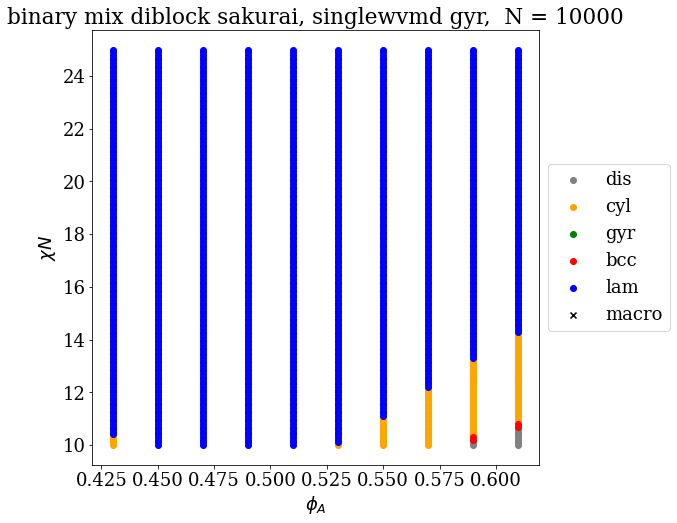

In [100]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl", color = "orange")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2], label = "gyr", color = "green")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2], label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam", color = "blue")
ax.scatter(macro_pnts[::2], macro_pnts[1::2], label = "macro", color = "black", marker = "x")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(10, 13)
ax.set_ylabel("$\chi N$")
ax.set_xlabel("$\phi_A$")
ax.set_title("binary mix diblock sakurai, singlewvmd gyr,  N = " + str(N) )

# symmetric diblock, asymmetric diblocks; different length

$f_A^{(s)} != f_A^{(l)} = 0.5; \alpha = \frac{N_s}{N_l}, \phi_s = $volume fraction of short polymer

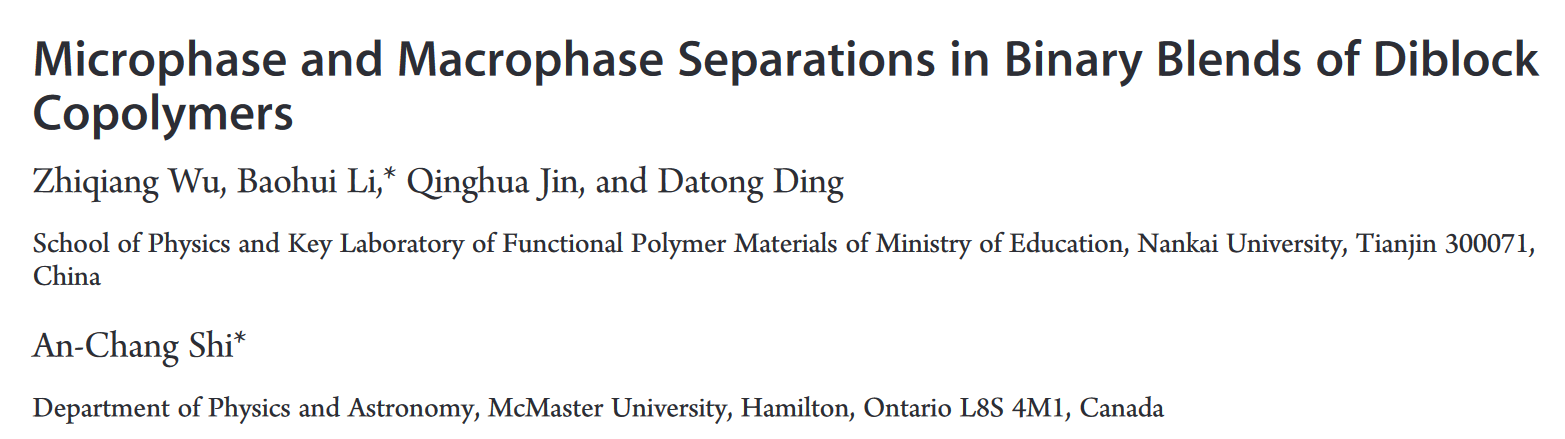

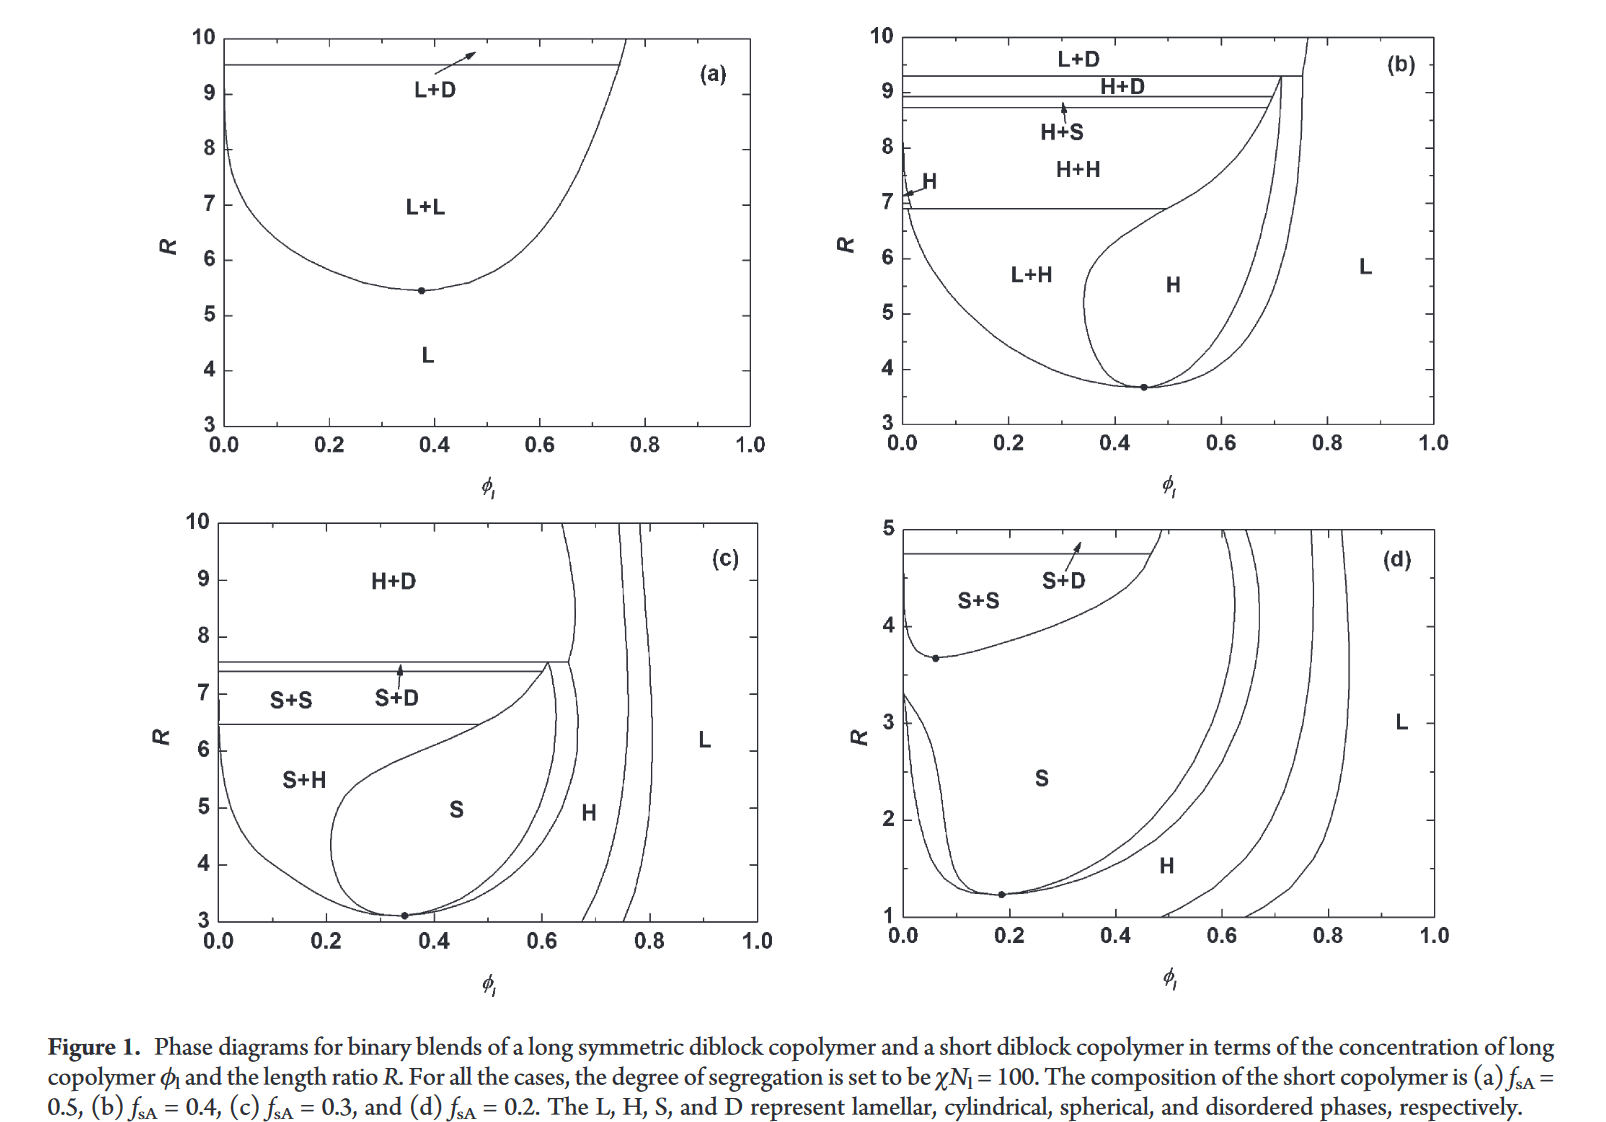

In [9]:
%%time
# Figure 1A
M_l = 36
N_l = 12000
# M_l = 20
# N_l = 10000
long = [0] * (M_l//2) + [1] * (M_l//2)

N_m = N_l / M_l

# short = [0,1]
# M_s = 2
# N_s = N_m * M_s

b=1
CHI = 100 / N_l

R_arr = [2, 3, 6, 9]
dens_short_arr = np.arange(0, 1.01, 0.05)

lam_pnts = np.array([])
cyl_pnts = np.array([])
bcc_pnts = np.array([])
gyr_pnts = np.array([])
sq_cyl_pnts = np.array([])
sim_cub_pnts = np.array([])
fcc_pnts = np.array([])
dis_pnts = np.array([])

macro_pnts = np.array([])
for r in R_arr:
    N_s = N_l / r
    M_s = int(N_s / N_m)
    short,d  =poly_mat_gen("diblock", M_s, n_p = 1, FA= 0.5)
    poly_mat = np.array([np.array(long), short])
#     print(poly_mat)
    M_arr = [M_l, M_s]
    for ds in dens_short_arr:
        dens = np.array([1-ds, ds])   
        mx = Mix(poly_mat, dens, M_arr, N_m, b)
        q_star = mx.q_star
        q_star = q_star[0]

    #     if q_star <= 0.01:
        if q_star <= 1/np.sqrt(mx.N*(mx.b**2)):
            #only disorderd or macrophase separation possible
            for CHI in chi_array:
                G2 = gamma2_E(mx, q_star, CHI)
                point = np.array([ds, CHI*N_l])
                if G2 < 0:
                    macro_pnts = np.append(macro_pnts, point)
                elif G2 >= 0:
                    dis_pnts = np.append(dis_pnts, point)
        else:
            lam_q = q_star*np.array([1, 0, 0])

            cyl_q1 = q_star*np.array([1, 0, 0])
            cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
            cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
            cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])

            bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
            bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
            bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
            bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
            bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
            bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])

            sq_6 = (1/np.sqrt(6)) * q_star
            gyr_q1 = sq_6*np.array([-1, 2, 1])
            gyr_q2 = sq_6*np.array([2, 1, -1])
            gyr_q3 = sq_6*np.array([1, -1, 2])
            gyr_q4 = sq_6*np.array([2, -1, -1])
            gyr_q5 = sq_6*np.array([-1, 2, -1])
            gyr_q6 = sq_6*np.array([-1, -1, 2])

            gyr_q7 = sq_6*np.array([2, 1, 1])
            gyr_q8 = sq_6*np.array([1, 2, 1])
            gyr_q9 = sq_6*np.array([1, 1, 2])
            gyr_q10 = sq_6*np.array([2, -1, 1])
            gyr_q11 = sq_6*np.array([1, 2, -1])
            gyr_q12 = sq_6*np.array([-1, 1, 2])

            sq_cyl_q1 = q_star * np.array([1,0,0])
            sq_cyl_q2 = q_star * np.array([0,1,0])

            sim_cub_q1 = q_star * np.array([1,0,0])
            sim_cub_q2 = q_star * np.array([0,1,0])
            sim_cub_q3 = q_star * np.array([0,0,1])

            fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
            fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
            fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
            fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])


            G3 = gamma3_E(mx, cyl_qs) # all g3s are eqivlaent
            lam_g3 = 0
            cyl_g3 = (1/6) * (1/(3*np.sqrt(3))) * 12 * G3
            bcc_g3 = -(4/(3*np.sqrt(6))) * G3 #* gamma3_E(mx, np.array([bcc_q6, bcc_q3, -bcc_q1]))
            gyr_g3 = -(1/6)  * (1/(12*np.sqrt(12))) * 48  * G3 #* gamma3_E(mx, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
            sq_cyl_g3 = 0
            sim_cub_g3 = 0
            fcc_g3 = 0

            G4_00 = gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
            lam_g4 = (1/24) * (6) * (1) * G4_00#gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
            cyl_g4 = (1/12)* (G4_00 + \
                      4*gamma4_E(mx, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
            bcc_g4 = (1/24)* (G4_00 \
                             + 8*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                             + 2*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                             + 4*gamma4_E(mx, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
            gyr_g4 = (1/24)* (1/(12*12)) * (72*G4_00 + \
                               288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q8, -gyr_q8])) + \
                               288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q10, -gyr_q10])) + \
                               288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q11, -gyr_q11])) + \
                               144*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q4, -gyr_q4])) + \
                               576*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q12, -gyr_q12])) + \
                               -288*gamma4_E(mx, np.array([gyr_q1, gyr_q4, -gyr_q10, -gyr_q5])) + \
                               144*gamma4_E(mx, np.array([gyr_q7, -gyr_q2, gyr_q4, -gyr_q10])) + \
                               -288*gamma4_E(mx, np.array([gyr_q1, -gyr_q5, -gyr_q7, gyr_q2])))

            G4_90deg = gamma4_E(mx, np.array([sq_cyl_q1 , -sq_cyl_q1 , sq_cyl_q2 , -sq_cyl_q2 ]))
            sq_cyl_g4 = (1/24) * (1/4) * (12*G4_00 + \
                                          24*G4_90deg)
            sim_cub_g4 = (1/24) * (1/9) * (18*G4_00+ \
                                           72*G4_90deg)
            fcc_g4 = (1/24) * (1/16) * (24*G4_00\
                                        + 144*gamma4_E(mx, np.array([fcc_q1, -fcc_q1, fcc_q2, -fcc_q2]))\
                                        - 48*gamma4_E(mx, np.array([-fcc_q1, fcc_q2, fcc_q3, fcc_q4])))

#             for CHI in chi_array:
            lam_g2 = (1/2) * 2 * (1) * gamma2_E(mx, q_star, CHI)                
            cyl_g2 = lam_g2#(1/2) * 6 * (1/3) * gamma2_E(mx, q_star, CHI)
            bcc_g2 = lam_g2#(1/2) * 12 * (1/6) * gamma2_E(mx, q_star, CHI)
            gyr_g2 = lam_g2
            sq_cyl_g2 = lam_g2#(1/2) * (1/2) * 4 * gamma2_E(mx, q_star, CHI)
            sim_cub_g2 = lam_g2
            fcc_g2 = lam_g2

    #         if cyl_g3>0:
    #             cyl_g3*= -1

    #         if gyr_g3>0:
    #             gyr_g3*= -1

    #         if bcc_g3>0:
    #             bcc_g3*= -1

            amp_l1 = np.real((-3*lam_g3 - np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
            amp_l2 = np.real((-3*lam_g3 + np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
            amp_c1 = np.real((-3*cyl_g3 - np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
            amp_c2 = np.real((-3*cyl_g3 + np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
            amp_bcc1 = np.real((-3*bcc_g3 - np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
            amp_bcc2 = np.real((-3*bcc_g3 + np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
            amp_g1 = np.real((-3*gyr_g3 - np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
            amp_g2 = np.real((-3*gyr_g3 + np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
            amp_sq_c1 = np.real((-3*sq_cyl_g3 - np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
            amp_sq_c2 = np.real((-3*sq_cyl_g3 + np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
            amp_sim_cub1 = np.real((-3*sim_cub_g3 - np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
            amp_sim_cub2 = np.real((-3*sim_cub_g3 + np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
            amp_fcc1 = np.real((-3*fcc_g3 - np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))
            amp_fcc2 = np.real((-3*fcc_g3 + np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))

            lamF_1 = np.real(amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 )
            cylF_1 = np.real(amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 )
            bccF_1 = np.real(amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4)
            gyrF_1 = np.real(amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4)
            sq_cylF_1 = np.real(amp_sq_c1**2 * sq_cyl_g2 + amp_sq_c1**3 * sq_cyl_g3 + amp_sq_c1**4 * sq_cyl_g4 )
            sim_cubF_1 = np.real(amp_sim_cub1**2 * sim_cub_g2 + amp_sim_cub1**3 * sim_cub_g3 + amp_sim_cub1**4 * sim_cub_g4 )
            fccF_1 = np.real(amp_fcc1**2 * fcc_g2 + amp_fcc1**3 * fcc_g3 + amp_fcc1**4 * fcc_g4)

            lamF_2 = np.real(amp_l2**2 * lam_g2 + amp_l2**3 * lam_g3 + amp_l2**4 * lam_g4)
            cylF_2 = np.real(amp_c2**2 * cyl_g2 + amp_c2**3 * cyl_g3 + amp_c2**4 * cyl_g4 )
            bccF_2 = np.real(amp_bcc2**2 * bcc_g2 + amp_bcc2**3 * bcc_g3 + amp_bcc2**4 * bcc_g4)
            gyrF_2 = np.real(amp_g2**2 * gyr_g2 + amp_g2**3 * gyr_g3 + amp_g2**4 * gyr_g4)
            sq_cylF_2 = np.real(amp_sq_c2**2 * sq_cyl_g2 + amp_sq_c2**3 * sq_cyl_g3 + amp_sq_c2**4 * sq_cyl_g4)
            sim_cubF_2 = np.real(amp_sim_cub2**2 * sim_cub_g2 + amp_sim_cub2**3 * sim_cub_g3 + amp_sim_cub2**4 * sim_cub_g4 )
            fccF_2 = np.real(amp_fcc2**2 * fcc_g2 + amp_fcc2**3 * fcc_g3 + amp_fcc2**4 * fcc_g4)

            lamF = min(lamF_1, lamF_2)
            cylF = min(cylF_1, cylF_2)
            bccF = min(bccF_1, bccF_2)
            gyrF = min(gyrF_1, gyrF_2)
            sq_cylF = min(sq_cylF_1, sq_cylF_2)
            sim_cubF = min(sim_cubF_1, sim_cubF_2)
            fccF = min(fccF_1, fccF_2)

            point = np.array([ds, r])

            minF = min([lamF, cylF, bccF, gyrF, sq_cylF, sim_cubF, fccF])
    #         print(lamF)
            if minF >= 0:
                dis_pnts = np.append(dis_pnts, point)
            elif minF == lamF:
                lam_pnts = np.append(lam_pnts, point) 
            elif minF == cylF:
                cyl_pnts = np.append(cyl_pnts, point)
            elif minF == bccF:
                bcc_pnts = np.append(bcc_pnts, point)
            elif minF == gyrF:
                gyr_pnts = np.append(gyr_pnts, point)
            elif minF == sq_cylF:
                sq_cyl_pnts = np.append(sq_cyl_pnts, point)
            elif minF == sim_cubF:
                sim_cub_pnts = np.append(sim_cub_pnts, point)
            elif minF == fccF:
                fcc_pnts = np.append(fcc_pnts, point)
            else:
                raise Exception("error in min F phase assignment")
#         print("one ds done")
    print("one r done!!")


one r done!!
one r done!!
one r done!!
one r done!!


Text(0.5, 1.0, 'binary mix diblock $f_A^{(1)} = f_A^{(2)} = 0.5, \\chi N_l = 100$ , $N_l$ = 12000')

<Figure size 432x288 with 0 Axes>

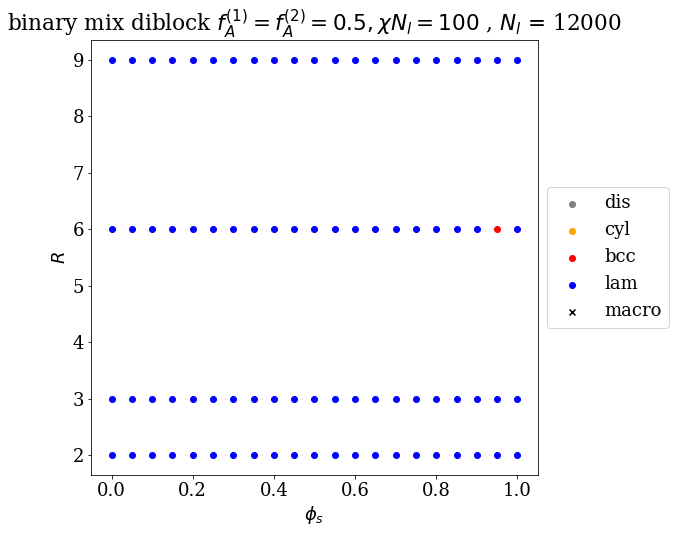

In [11]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl", color = "orange")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2], label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam", color = "blue")
ax.scatter(macro_pnts[::2], macro_pnts[1::2], label = "macro", color = "black", marker = "x")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(10, 13)
ax.set_ylabel("$R$")
ax.set_xlabel("$\phi_s$")
ax.set_title("binary mix diblock $f_A^{(1)} = f_A^{(2)} = 0.4, \chi N_l = 100$ , $N_l$ = " + str(N_l) )

In [46]:
%%time
# Figure 1B
M_l = 40
N_l = 10000
# M_l = 20
# N_l = 10000
long = [0] * (M_l//2) + [1] * (M_l//2)

N_m = N_l / M_l

# short = [0,1]
# M_s = 2
# N_s = N_m * M_s

b=1
CHI = 100 / N_l

R_arr = [2, 4, 8]#np.arange(2,11,1)#
dens_short_arr = np.arange(0, 1.01, 0.05)

lam_pnts = np.array([])
cyl_pnts = np.array([])
bcc_pnts = np.array([])
gyr_pnts = np.array([])
sq_cyl_pnts = np.array([])
sim_cub_pnts = np.array([])
fcc_pnts = np.array([])
dis_pnts = np.array([])

macro_pnts = np.array([])
for r in R_arr:
    N_s = N_l / r
    M_s = int(N_s / N_m)
#     print("------------------")
#     print("R: ", r)
#     print(M_s)
#     print(M_s * 0.4)
    short,d  =poly_mat_gen("diblock", M_s, n_p = 1, FA= 0.4)
    poly_mat = np.array([np.array(long), short])
#     print(poly_mat)
    M_arr = [M_l, M_s]
    for ds in dens_short_arr:
        dens = np.array([1-ds, ds])   
        mx = Mix(poly_mat, dens, M_arr, N_m, b)
        q_star = mx.q_star
        q_star = q_star[0]

    #     if q_star <= 0.01:
        if q_star <= 1/np.sqrt(mx.N*(mx.b**2)):
            #only disorderd or macrophase separation possible
            for CHI in chi_array:
                G2 = gamma2_E(mx, q_star, CHI)
                point = np.array([ds, CHI*N_l])
                if G2 < 0:
                    macro_pnts = np.append(macro_pnts, point)
                elif G2 >= 0:
                    dis_pnts = np.append(dis_pnts, point)
        else:
            lam_q = q_star*np.array([1, 0, 0])

            cyl_q1 = q_star*np.array([1, 0, 0])
            cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
            cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
            cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])

            bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
            bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
            bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
            bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
            bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
            bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])

            sq_6 = (1/np.sqrt(6)) * q_star
            gyr_q1 = sq_6*np.array([-1, 2, 1])
            gyr_q2 = sq_6*np.array([2, 1, -1])
            gyr_q3 = sq_6*np.array([1, -1, 2])
            gyr_q4 = sq_6*np.array([2, -1, -1])
            gyr_q5 = sq_6*np.array([-1, 2, -1])
            gyr_q6 = sq_6*np.array([-1, -1, 2])

            gyr_q7 = sq_6*np.array([2, 1, 1])
            gyr_q8 = sq_6*np.array([1, 2, 1])
            gyr_q9 = sq_6*np.array([1, 1, 2])
            gyr_q10 = sq_6*np.array([2, -1, 1])
            gyr_q11 = sq_6*np.array([1, 2, -1])
            gyr_q12 = sq_6*np.array([-1, 1, 2])

            sq_cyl_q1 = q_star * np.array([1,0,0])
            sq_cyl_q2 = q_star * np.array([0,1,0])

            sim_cub_q1 = q_star * np.array([1,0,0])
            sim_cub_q2 = q_star * np.array([0,1,0])
            sim_cub_q3 = q_star * np.array([0,0,1])

            fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
            fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
            fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
            fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])


            G3 = gamma3_E(mx, cyl_qs) # all g3s are eqivlaent
            lam_g3 = 0
            cyl_g3 = (1/6) * (1/(3*np.sqrt(3))) * 12 * G3
            bcc_g3 = -(4/(3*np.sqrt(6))) * G3 #* gamma3_E(mx, np.array([bcc_q6, bcc_q3, -bcc_q1]))
            gyr_g3 = -(1/6)  * (1/(12*np.sqrt(12))) * 48  * G3 #* gamma3_E(mx, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
            sq_cyl_g3 = 0
            sim_cub_g3 = 0
            fcc_g3 = 0

            G4_00 = gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
            lam_g4 = (1/24) * (6) * (1) * G4_00#gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
            cyl_g4 = (1/12)* (G4_00 + \
                      4*gamma4_E(mx, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
            bcc_g4 = (1/24)* (G4_00 \
                             + 8*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                             + 2*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                             + 4*gamma4_E(mx, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
            gyr_g4 = (1/24)* (1/(12*12)) * (72*G4_00 + \
                               288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q8, -gyr_q8])) + \
                               288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q10, -gyr_q10])) + \
                               288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q11, -gyr_q11])) + \
                               144*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q4, -gyr_q4])) + \
                               576*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q12, -gyr_q12])) + \
                               -288*gamma4_E(mx, np.array([gyr_q1, gyr_q4, -gyr_q10, -gyr_q5])) + \
                               144*gamma4_E(mx, np.array([gyr_q7, -gyr_q2, gyr_q4, -gyr_q10])) + \
                               -288*gamma4_E(mx, np.array([gyr_q1, -gyr_q5, -gyr_q7, gyr_q2])))

            G4_90deg = gamma4_E(mx, np.array([sq_cyl_q1 , -sq_cyl_q1 , sq_cyl_q2 , -sq_cyl_q2 ]))
            sq_cyl_g4 = (1/24) * (1/4) * (12*G4_00 + \
                                          24*G4_90deg)
            sim_cub_g4 = (1/24) * (1/9) * (18*G4_00+ \
                                           72*G4_90deg)
            fcc_g4 = (1/24) * (1/16) * (24*G4_00\
                                        + 144*gamma4_E(mx, np.array([fcc_q1, -fcc_q1, fcc_q2, -fcc_q2]))\
                                        - 48*gamma4_E(mx, np.array([-fcc_q1, fcc_q2, fcc_q3, fcc_q4])))

#             for CHI in chi_array:
            lam_g2 = (1/2) * 2 * (1) * gamma2_E(mx, q_star, CHI)                
            cyl_g2 = lam_g2#(1/2) * 6 * (1/3) * gamma2_E(mx, q_star, CHI)
            bcc_g2 = lam_g2#(1/2) * 12 * (1/6) * gamma2_E(mx, q_star, CHI)
            gyr_g2 = lam_g2
            sq_cyl_g2 = lam_g2#(1/2) * (1/2) * 4 * gamma2_E(mx, q_star, CHI)
            sim_cub_g2 = lam_g2
            fcc_g2 = lam_g2

    #         if cyl_g3>0:
    #             cyl_g3*= -1

    #         if gyr_g3>0:
    #             gyr_g3*= -1

    #         if bcc_g3>0:
    #             bcc_g3*= -1

            amp_l1 = np.real((-3*lam_g3 - np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
            amp_l2 = np.real((-3*lam_g3 + np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
            amp_c1 = np.real((-3*cyl_g3 - np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
            amp_c2 = np.real((-3*cyl_g3 + np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
            amp_bcc1 = np.real((-3*bcc_g3 - np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
            amp_bcc2 = np.real((-3*bcc_g3 + np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
            amp_g1 = np.real((-3*gyr_g3 - np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
            amp_g2 = np.real((-3*gyr_g3 + np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
            amp_sq_c1 = np.real((-3*sq_cyl_g3 - np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
            amp_sq_c2 = np.real((-3*sq_cyl_g3 + np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
            amp_sim_cub1 = np.real((-3*sim_cub_g3 - np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
            amp_sim_cub2 = np.real((-3*sim_cub_g3 + np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
            amp_fcc1 = np.real((-3*fcc_g3 - np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))
            amp_fcc2 = np.real((-3*fcc_g3 + np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))

            lamF_1 = np.real(amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 )
            cylF_1 = np.real(amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 )
            bccF_1 = np.real(amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4)
            gyrF_1 = np.real(amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4)
            sq_cylF_1 = np.real(amp_sq_c1**2 * sq_cyl_g2 + amp_sq_c1**3 * sq_cyl_g3 + amp_sq_c1**4 * sq_cyl_g4 )
            sim_cubF_1 = np.real(amp_sim_cub1**2 * sim_cub_g2 + amp_sim_cub1**3 * sim_cub_g3 + amp_sim_cub1**4 * sim_cub_g4 )
            fccF_1 = np.real(amp_fcc1**2 * fcc_g2 + amp_fcc1**3 * fcc_g3 + amp_fcc1**4 * fcc_g4)

            lamF_2 = np.real(amp_l2**2 * lam_g2 + amp_l2**3 * lam_g3 + amp_l2**4 * lam_g4)
            cylF_2 = np.real(amp_c2**2 * cyl_g2 + amp_c2**3 * cyl_g3 + amp_c2**4 * cyl_g4 )
            bccF_2 = np.real(amp_bcc2**2 * bcc_g2 + amp_bcc2**3 * bcc_g3 + amp_bcc2**4 * bcc_g4)
            gyrF_2 = np.real(amp_g2**2 * gyr_g2 + amp_g2**3 * gyr_g3 + amp_g2**4 * gyr_g4)
            sq_cylF_2 = np.real(amp_sq_c2**2 * sq_cyl_g2 + amp_sq_c2**3 * sq_cyl_g3 + amp_sq_c2**4 * sq_cyl_g4)
            sim_cubF_2 = np.real(amp_sim_cub2**2 * sim_cub_g2 + amp_sim_cub2**3 * sim_cub_g3 + amp_sim_cub2**4 * sim_cub_g4 )
            fccF_2 = np.real(amp_fcc2**2 * fcc_g2 + amp_fcc2**3 * fcc_g3 + amp_fcc2**4 * fcc_g4)

            lamF = min(lamF_1, lamF_2)
            cylF = min(cylF_1, cylF_2)
            bccF = min(bccF_1, bccF_2)
            gyrF = min(gyrF_1, gyrF_2)
            sq_cylF = min(sq_cylF_1, sq_cylF_2)
            sim_cubF = min(sim_cubF_1, sim_cubF_2)
            fccF = min(fccF_1, fccF_2)

            point = np.array([ds, r])

            minF = min([lamF, cylF, bccF, gyrF, sq_cylF, sim_cubF, fccF])
    #         print(lamF)
            if minF >= 0:
                dis_pnts = np.append(dis_pnts, point)
            elif minF == lamF:
                lam_pnts = np.append(lam_pnts, point) 
            elif minF == cylF:
                cyl_pnts = np.append(cyl_pnts, point)
            elif minF == bccF:
                bcc_pnts = np.append(bcc_pnts, point)
            elif minF == gyrF:
                gyr_pnts = np.append(gyr_pnts, point)
            elif minF == sq_cylF:
                sq_cyl_pnts = np.append(sq_cyl_pnts, point)
            elif minF == sim_cubF:
                sim_cub_pnts = np.append(sim_cub_pnts, point)
            elif minF == fccF:
                fcc_pnts = np.append(fcc_pnts, point)
            else:
                raise Exception("error in min F phase assignment")
#         print("one ds done")
    print("one r done!!")


one r done!!
one r done!!
one r done!!
Wall time: 3h 1min 46s


In [60]:
%%time
# Figure 1B
M_l = 30
N_l = 10000
# M_l = 20
# N_l = 10000
long = [0] * (M_l//2) + [1] * (M_l//2)

N_m = N_l / M_l

# short = [0,1]
# M_s = 2
# N_s = N_m * M_s

b=1
CHI = 100 / N_l

R_arr = [1,2,3]#np.arange(1,11,1)#[2, 4, 8]#
dens_short_arr = np.arange(0, 1.01, 0.05)

lam_pnts = np.array([])
cyl_pnts = np.array([])
bcc_pnts = np.array([])
gyr_pnts = np.array([])
sq_cyl_pnts = np.array([])
sim_cub_pnts = np.array([])
fcc_pnts = np.array([])
dis_pnts = np.array([])

macro_pnts = np.array([])
for r in R_arr:
    N_s = N_l / r
    M_s = int(N_s / N_m)
#     print("------------------")
#     print("R: ", r)
#     print(M_s)
#     print((N_s/N_m) * 0.2)
    short,d  =poly_mat_gen("diblock", M_s, n_p = 1, FA= 0.2)
    poly_mat = np.array([np.array(long), short])
#     print(poly_mat)
    M_arr = [M_l, M_s]
    for ds in dens_short_arr:
        dens = np.array([1-ds, ds])   
        mx = Mix(poly_mat, dens, M_arr, N_m, b)
        q_star = mx.q_star
        q_star = q_star[0]

    #     if q_star <= 0.01:
        if q_star <= 1/np.sqrt(mx.N*(mx.b**2)):
            #only disorderd or macrophase separation possible
            for CHI in chi_array:
                G2 = gamma2_E(mx, q_star, CHI)
                point = np.array([ds, CHI*N_l])
                if G2 < 0:
                    macro_pnts = np.append(macro_pnts, point)
                elif G2 >= 0:
                    dis_pnts = np.append(dis_pnts, point)
        else:
            lam_q = q_star*np.array([1, 0, 0])

            cyl_q1 = q_star*np.array([1, 0, 0])
            cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
            cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
            cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])

            bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
            bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
            bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
            bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
            bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
            bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])

            sq_6 = (1/np.sqrt(6)) * q_star
            gyr_q1 = sq_6*np.array([-1, 2, 1])
            gyr_q2 = sq_6*np.array([2, 1, -1])
            gyr_q3 = sq_6*np.array([1, -1, 2])
            gyr_q4 = sq_6*np.array([2, -1, -1])
            gyr_q5 = sq_6*np.array([-1, 2, -1])
            gyr_q6 = sq_6*np.array([-1, -1, 2])

            gyr_q7 = sq_6*np.array([2, 1, 1])
            gyr_q8 = sq_6*np.array([1, 2, 1])
            gyr_q9 = sq_6*np.array([1, 1, 2])
            gyr_q10 = sq_6*np.array([2, -1, 1])
            gyr_q11 = sq_6*np.array([1, 2, -1])
            gyr_q12 = sq_6*np.array([-1, 1, 2])

            sq_cyl_q1 = q_star * np.array([1,0,0])
            sq_cyl_q2 = q_star * np.array([0,1,0])

            sim_cub_q1 = q_star * np.array([1,0,0])
            sim_cub_q2 = q_star * np.array([0,1,0])
            sim_cub_q3 = q_star * np.array([0,0,1])

            fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
            fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
            fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
            fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])


            G3 = gamma3_E(mx, cyl_qs) # all g3s are eqivlaent
            lam_g3 = 0
            cyl_g3 = (1/6) * (1/(3*np.sqrt(3))) * 12 * G3
            bcc_g3 = -(4/(3*np.sqrt(6))) * G3 #* gamma3_E(mx, np.array([bcc_q6, bcc_q3, -bcc_q1]))
            gyr_g3 = -(1/6)  * (1/(12*np.sqrt(12))) * 48  * G3 #* gamma3_E(mx, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
            sq_cyl_g3 = 0
            sim_cub_g3 = 0
            fcc_g3 = 0

            G4_00 = gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
            lam_g4 = (1/24) * (6) * (1) * G4_00#gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
            cyl_g4 = (1/12)* (G4_00 + \
                      4*gamma4_E(mx, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
            bcc_g4 = (1/24)* (G4_00 \
                             + 8*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                             + 2*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                             + 4*gamma4_E(mx, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
            gyr_g4 = (1/24)* (1/(12*12)) * (72*G4_00 + \
                               288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q8, -gyr_q8])) + \
                               288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q10, -gyr_q10])) + \
                               288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q11, -gyr_q11])) + \
                               144*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q4, -gyr_q4])) + \
                               576*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q12, -gyr_q12])) + \
                               -288*gamma4_E(mx, np.array([gyr_q1, gyr_q4, -gyr_q10, -gyr_q5])) + \
                               144*gamma4_E(mx, np.array([gyr_q7, -gyr_q2, gyr_q4, -gyr_q10])) + \
                               -288*gamma4_E(mx, np.array([gyr_q1, -gyr_q5, -gyr_q7, gyr_q2])))

            G4_90deg = gamma4_E(mx, np.array([sq_cyl_q1 , -sq_cyl_q1 , sq_cyl_q2 , -sq_cyl_q2 ]))
            sq_cyl_g4 = (1/24) * (1/4) * (12*G4_00 + \
                                          24*G4_90deg)
            sim_cub_g4 = (1/24) * (1/9) * (18*G4_00+ \
                                           72*G4_90deg)
            fcc_g4 = (1/24) * (1/16) * (24*G4_00\
                                        + 144*gamma4_E(mx, np.array([fcc_q1, -fcc_q1, fcc_q2, -fcc_q2]))\
                                        - 48*gamma4_E(mx, np.array([-fcc_q1, fcc_q2, fcc_q3, fcc_q4])))

#             for CHI in chi_array:
            lam_g2 = (1/2) * 2 * (1) * gamma2_E(mx, q_star, CHI)                
            cyl_g2 = lam_g2#(1/2) * 6 * (1/3) * gamma2_E(mx, q_star, CHI)
            bcc_g2 = lam_g2#(1/2) * 12 * (1/6) * gamma2_E(mx, q_star, CHI)
            gyr_g2 = lam_g2
            sq_cyl_g2 = lam_g2#(1/2) * (1/2) * 4 * gamma2_E(mx, q_star, CHI)
            sim_cub_g2 = lam_g2
            fcc_g2 = lam_g2

    #         if cyl_g3>0:
    #             cyl_g3*= -1

    #         if gyr_g3>0:
    #             gyr_g3*= -1

    #         if bcc_g3>0:
    #             bcc_g3*= -1

            amp_l1 = np.real((-3*lam_g3 - np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
            amp_l2 = np.real((-3*lam_g3 + np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
            amp_c1 = np.real((-3*cyl_g3 - np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
            amp_c2 = np.real((-3*cyl_g3 + np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
            amp_bcc1 = np.real((-3*bcc_g3 - np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
            amp_bcc2 = np.real((-3*bcc_g3 + np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
            amp_g1 = np.real((-3*gyr_g3 - np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
            amp_g2 = np.real((-3*gyr_g3 + np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
            amp_sq_c1 = np.real((-3*sq_cyl_g3 - np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
            amp_sq_c2 = np.real((-3*sq_cyl_g3 + np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
            amp_sim_cub1 = np.real((-3*sim_cub_g3 - np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
            amp_sim_cub2 = np.real((-3*sim_cub_g3 + np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
            amp_fcc1 = np.real((-3*fcc_g3 - np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))
            amp_fcc2 = np.real((-3*fcc_g3 + np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))

            lamF_1 = np.real(amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 )
            cylF_1 = np.real(amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 )
            bccF_1 = np.real(amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4)
            gyrF_1 = np.real(amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4)
            sq_cylF_1 = np.real(amp_sq_c1**2 * sq_cyl_g2 + amp_sq_c1**3 * sq_cyl_g3 + amp_sq_c1**4 * sq_cyl_g4 )
            sim_cubF_1 = np.real(amp_sim_cub1**2 * sim_cub_g2 + amp_sim_cub1**3 * sim_cub_g3 + amp_sim_cub1**4 * sim_cub_g4 )
            fccF_1 = np.real(amp_fcc1**2 * fcc_g2 + amp_fcc1**3 * fcc_g3 + amp_fcc1**4 * fcc_g4)

            lamF_2 = np.real(amp_l2**2 * lam_g2 + amp_l2**3 * lam_g3 + amp_l2**4 * lam_g4)
            cylF_2 = np.real(amp_c2**2 * cyl_g2 + amp_c2**3 * cyl_g3 + amp_c2**4 * cyl_g4 )
            bccF_2 = np.real(amp_bcc2**2 * bcc_g2 + amp_bcc2**3 * bcc_g3 + amp_bcc2**4 * bcc_g4)
            gyrF_2 = np.real(amp_g2**2 * gyr_g2 + amp_g2**3 * gyr_g3 + amp_g2**4 * gyr_g4)
            sq_cylF_2 = np.real(amp_sq_c2**2 * sq_cyl_g2 + amp_sq_c2**3 * sq_cyl_g3 + amp_sq_c2**4 * sq_cyl_g4)
            sim_cubF_2 = np.real(amp_sim_cub2**2 * sim_cub_g2 + amp_sim_cub2**3 * sim_cub_g3 + amp_sim_cub2**4 * sim_cub_g4 )
            fccF_2 = np.real(amp_fcc2**2 * fcc_g2 + amp_fcc2**3 * fcc_g3 + amp_fcc2**4 * fcc_g4)

            lamF = min(lamF_1, lamF_2)
            cylF = min(cylF_1, cylF_2)
            bccF = min(bccF_1, bccF_2)
            gyrF = min(gyrF_1, gyrF_2)
            sq_cylF = min(sq_cylF_1, sq_cylF_2)
            sim_cubF = min(sim_cubF_1, sim_cubF_2)
            fccF = min(fccF_1, fccF_2)

            point = np.array([ds, r])

            minF = min([lamF, cylF, bccF, gyrF, sq_cylF, sim_cubF, fccF])
    #         print(lamF)
            if minF >= 0:
                dis_pnts = np.append(dis_pnts, point)
            elif minF == lamF:
                lam_pnts = np.append(lam_pnts, point) 
            elif minF == cylF:
                cyl_pnts = np.append(cyl_pnts, point)
            elif minF == bccF:
                bcc_pnts = np.append(bcc_pnts, point)
            elif minF == gyrF:
                gyr_pnts = np.append(gyr_pnts, point)
            elif minF == sq_cylF:
                sq_cyl_pnts = np.append(sq_cyl_pnts, point)
            elif minF == sim_cubF:
                sim_cub_pnts = np.append(sim_cub_pnts, point)
            elif minF == fccF:
                fcc_pnts = np.append(fcc_pnts, point)
            else:
                raise Exception("error in min F phase assignment")
#         print("one ds done")
    print("one r done!!")


one r done!!
one r done!!
one r done!!
Wall time: 51min 55s


Text(0.5, 1.0, 'binary mix diblock $f_A^{(1)} = 0.5, f_A^{(2)} = 0.2, \\chi N_l = 100$ , $N_l$ = 10000')

<Figure size 432x288 with 0 Axes>

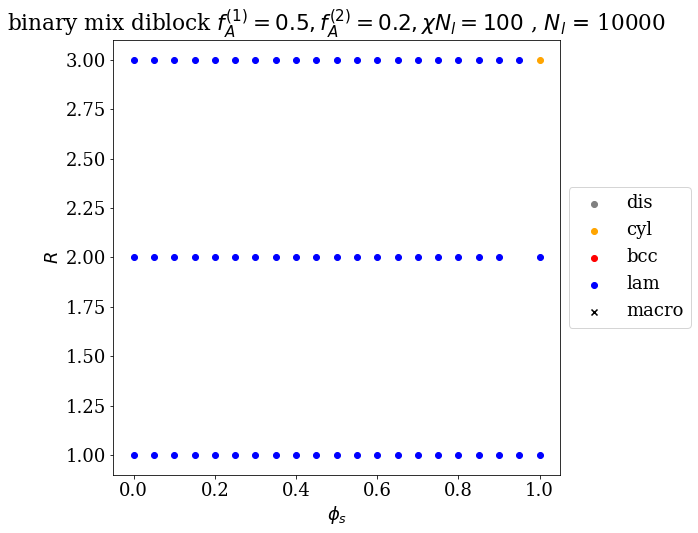

In [61]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl", color = "orange")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2], label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam", color = "blue")
ax.scatter(macro_pnts[::2], macro_pnts[1::2], label = "macro", color = "black", marker = "x")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(10, 13)
ax.set_ylabel("$R$")
ax.set_xlabel("$\phi_s$")
ax.set_title("binary mix diblock $f_A^{(1)} = 0.5, f_A^{(2)} = 0.2, \chi N_l = 100$ , $N_l$ = " + str(N_l) )

# symmetric diblocks different length

$f_A^{(l)} = f_A^{(s)} = 0.5; \alpha = \frac{N_s}{N_l}, \phi_s = $volume fraction of short polymer

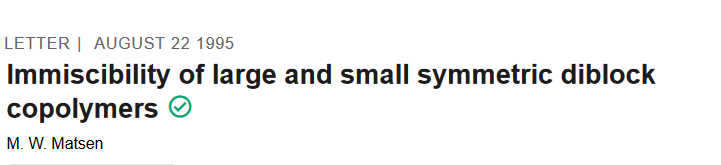

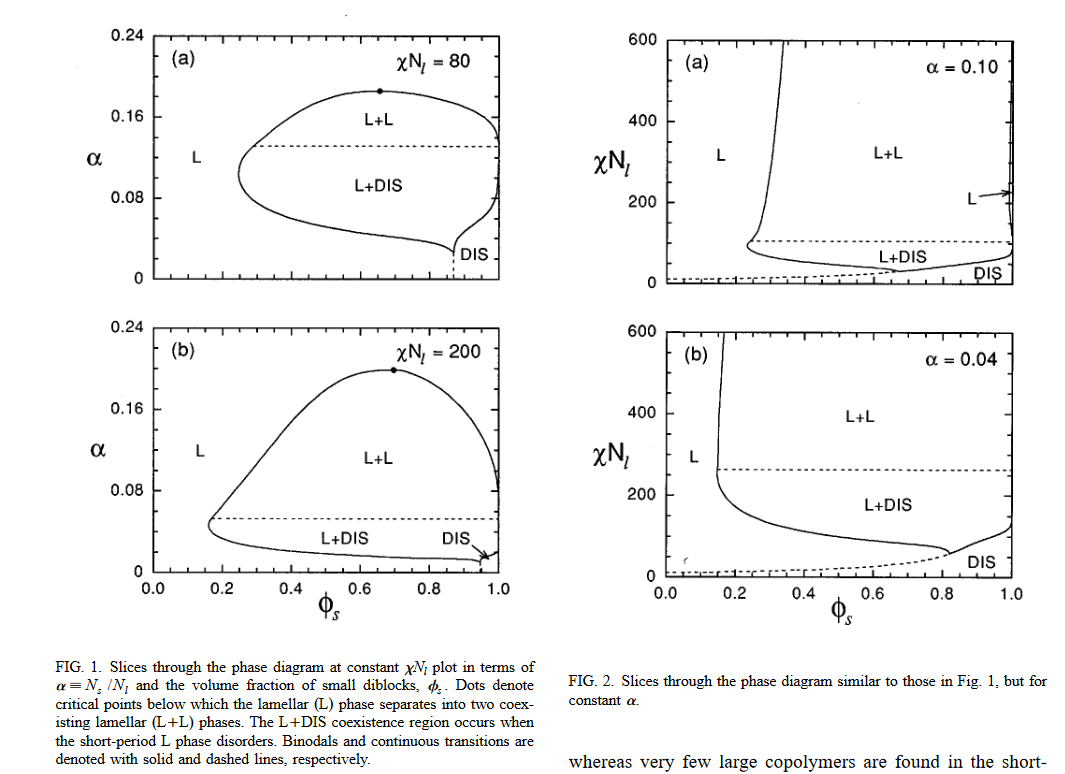

In [ ]:
%%time
#FIG 2A

long = [0] * 10 + [1] * 10
M_l = 20
N_l = 10000
N_m = N_l / M_l

short = [0,1]
M_s = 2
N_s = N_m * M_s

poly_mat = [long, short]
M_arr = [M_l, M_s]

b=1
# M= M_l


dens_short_arr = np.arange(0, 1.01, 0.05)
chi_array = np.arange(0, 601, 10) / N_l

lam_pnts = np.array([])
cyl_pnts = np.array([])
bcc_pnts = np.array([])
gyr_pnts = np.array([])
sq_cyl_pnts = np.array([])
sim_cub_pnts = np.array([])
fcc_pnts = np.array([])
dis_pnts = np.array([])

macro_pnts = np.array([])

for ds in dens_short_arr:
    dens = [1-ds, ds]   
    mx = Mix(poly_mat, dens, M_arr, N_m, b)
    q_star = mx.q_star
    q_star = q_star[0]

#     if q_star <= 0.01:
    if q_star <= 1/np.sqrt(mx.N*(mx.b**2)):
        #only disorderd or macrophase separation possible
        for CHI in chi_array:
            G2 = gamma2_E(mx, q_star, CHI)
            point = np.array([ds, CHI*N_l])
            if G2 < 0:
                macro_pnts = np.append(macro_pnts, point)
            elif G2 >= 0:
                dis_pnts = np.append(dis_pnts, point)
    else:
        lam_q = q_star*np.array([1, 0, 0])

        cyl_q1 = q_star*np.array([1, 0, 0])
        cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
        cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
        cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])

        bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
        bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
        bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
        bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
        bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
        bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])

        sq_6 = (1/np.sqrt(6)) * q_star
        gyr_q1 = sq_6*np.array([-1, 2, 1])
        gyr_q2 = sq_6*np.array([2, 1, -1])
        gyr_q3 = sq_6*np.array([1, -1, 2])
        gyr_q4 = sq_6*np.array([2, -1, -1])
        gyr_q5 = sq_6*np.array([-1, 2, -1])
        gyr_q6 = sq_6*np.array([-1, -1, 2])

        gyr_q7 = sq_6*np.array([2, 1, 1])
        gyr_q8 = sq_6*np.array([1, 2, 1])
        gyr_q9 = sq_6*np.array([1, 1, 2])
        gyr_q10 = sq_6*np.array([2, -1, 1])
        gyr_q11 = sq_6*np.array([1, 2, -1])
        gyr_q12 = sq_6*np.array([-1, 1, 2])

        sq_cyl_q1 = q_star * np.array([1,0,0])
        sq_cyl_q2 = q_star * np.array([0,1,0])

        sim_cub_q1 = q_star * np.array([1,0,0])
        sim_cub_q2 = q_star * np.array([0,1,0])
        sim_cub_q3 = q_star * np.array([0,0,1])

        fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
        fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
        fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
        fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])


        G3 = gamma3_E(mx, cyl_qs) # all g3s are eqivlaent
        lam_g3 = 0
        cyl_g3 = (1/6) * (1/(3*np.sqrt(3))) * 12 * G3
        bcc_g3 = -(4/(3*np.sqrt(6))) * G3 #* gamma3_E(mx, np.array([bcc_q6, bcc_q3, -bcc_q1]))
        gyr_g3 = -(1/6)  * (1/(12*np.sqrt(12))) * 48  * G3 #* gamma3_E(mx, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
        sq_cyl_g3 = 0
        sim_cub_g3 = 0
        fcc_g3 = 0

        G4_00 = gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
        lam_g4 = (1/24) * (6) * (1) * G4_00#gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
        cyl_g4 = (1/12)* (G4_00 + \
                  4*gamma4_E(mx, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
        bcc_g4 = (1/24)* (G4_00 \
                         + 8*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                         + 2*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                         + 4*gamma4_E(mx, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
        gyr_g4 = (1/24)* (1/(12*12)) * (72*G4_00 + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q8, -gyr_q8])) + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q10, -gyr_q10])) + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q11, -gyr_q11])) + \
                           144*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q4, -gyr_q4])) + \
                           576*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q12, -gyr_q12])) + \
                           -288*gamma4_E(mx, np.array([gyr_q1, gyr_q4, -gyr_q10, -gyr_q5])) + \
                           144*gamma4_E(mx, np.array([gyr_q7, -gyr_q2, gyr_q4, -gyr_q10])) + \
                           -288*gamma4_E(mx, np.array([gyr_q1, -gyr_q5, -gyr_q7, gyr_q2])))

        G4_90deg = gamma4_E(mx, np.array([sq_cyl_q1 , -sq_cyl_q1 , sq_cyl_q2 , -sq_cyl_q2 ]))
        sq_cyl_g4 = (1/24) * (1/4) * (12*G4_00 + \
                                      24*G4_90deg)
        sim_cub_g4 = (1/24) * (1/9) * (18*G4_00+ \
                                       72*G4_90deg)
        fcc_g4 = (1/24) * (1/16) * (24*G4_00\
                                    + 144*gamma4_E(mx, np.array([fcc_q1, -fcc_q1, fcc_q2, -fcc_q2]))\
                                    - 48*gamma4_E(mx, np.array([-fcc_q1, fcc_q2, fcc_q3, fcc_q4])))

        for CHI in chi_array:
            lam_g2 = (1/2) * 2 * (1) * gamma2_E(mx, q_star, CHI)                
            cyl_g2 = lam_g2#(1/2) * 6 * (1/3) * gamma2_E(mx, q_star, CHI)
            bcc_g2 = lam_g2#(1/2) * 12 * (1/6) * gamma2_E(mx, q_star, CHI)
            gyr_g2 = lam_g2
            sq_cyl_g2 = lam_g2#(1/2) * (1/2) * 4 * gamma2_E(mx, q_star, CHI)
            sim_cub_g2 = lam_g2
            fcc_g2 = lam_g2

    #         if cyl_g3>0:
    #             cyl_g3*= -1

    #         if gyr_g3>0:
    #             gyr_g3*= -1

    #         if bcc_g3>0:
    #             bcc_g3*= -1

            amp_l1 = np.real((-3*lam_g3 - np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
            amp_l2 = np.real((-3*lam_g3 + np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
            amp_c1 = np.real((-3*cyl_g3 - np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
            amp_c2 = np.real((-3*cyl_g3 + np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
            amp_bcc1 = np.real((-3*bcc_g3 - np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
            amp_bcc2 = np.real((-3*bcc_g3 + np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
            amp_g1 = np.real((-3*gyr_g3 - np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
            amp_g2 = np.real((-3*gyr_g3 + np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
            amp_sq_c1 = np.real((-3*sq_cyl_g3 - np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
            amp_sq_c2 = np.real((-3*sq_cyl_g3 + np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
            amp_sim_cub1 = np.real((-3*sim_cub_g3 - np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
            amp_sim_cub2 = np.real((-3*sim_cub_g3 + np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
            amp_fcc1 = np.real((-3*fcc_g3 - np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))
            amp_fcc2 = np.real((-3*fcc_g3 + np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))

            lamF_1 = np.real(amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 )
            cylF_1 = np.real(amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 )
            bccF_1 = np.real(amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4)
            gyrF_1 = np.real(amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4)
            sq_cylF_1 = np.real(amp_sq_c1**2 * sq_cyl_g2 + amp_sq_c1**3 * sq_cyl_g3 + amp_sq_c1**4 * sq_cyl_g4 )
            sim_cubF_1 = np.real(amp_sim_cub1**2 * sim_cub_g2 + amp_sim_cub1**3 * sim_cub_g3 + amp_sim_cub1**4 * sim_cub_g4 )
            fccF_1 = np.real(amp_fcc1**2 * fcc_g2 + amp_fcc1**3 * fcc_g3 + amp_fcc1**4 * fcc_g4)

            lamF_2 = np.real(amp_l2**2 * lam_g2 + amp_l2**3 * lam_g3 + amp_l2**4 * lam_g4)
            cylF_2 = np.real(amp_c2**2 * cyl_g2 + amp_c2**3 * cyl_g3 + amp_c2**4 * cyl_g4 )
            bccF_2 = np.real(amp_bcc2**2 * bcc_g2 + amp_bcc2**3 * bcc_g3 + amp_bcc2**4 * bcc_g4)
            gyrF_2 = np.real(amp_g2**2 * gyr_g2 + amp_g2**3 * gyr_g3 + amp_g2**4 * gyr_g4)
            sq_cylF_2 = np.real(amp_sq_c2**2 * sq_cyl_g2 + amp_sq_c2**3 * sq_cyl_g3 + amp_sq_c2**4 * sq_cyl_g4)
            sim_cubF_2 = np.real(amp_sim_cub2**2 * sim_cub_g2 + amp_sim_cub2**3 * sim_cub_g3 + amp_sim_cub2**4 * sim_cub_g4 )
            fccF_2 = np.real(amp_fcc2**2 * fcc_g2 + amp_fcc2**3 * fcc_g3 + amp_fcc2**4 * fcc_g4)

            lamF = min(lamF_1, lamF_2)
            cylF = min(cylF_1, cylF_2)
            bccF = min(bccF_1, bccF_2)
            gyrF = min(gyrF_1, gyrF_2)
            sq_cylF = min(sq_cylF_1, sq_cylF_2)
            sim_cubF = min(sim_cubF_1, sim_cubF_2)
            fccF = min(fccF_1, fccF_2)

            point = np.array([ds, CHI*N_l])

            minF = min([lamF, cylF, bccF, gyrF, sq_cylF, sim_cubF, fccF])
    #         print(lamF)
            if minF >= 0:
                dis_pnts = np.append(dis_pnts, point)
            elif minF == lamF:
                lam_pnts = np.append(lam_pnts, point) 
            elif minF == cylF:
                cyl_pnts = np.append(cyl_pnts, point)
            elif minF == bccF:
                bcc_pnts = np.append(bcc_pnts, point)
            elif minF == gyrF:
                gyr_pnts = np.append(gyr_pnts, point)
            elif minF == sq_cylF:
                sq_cyl_pnts = np.append(sq_cyl_pnts, point)
            elif minF == sim_cubF:
                sim_cub_pnts = np.append(sim_cub_pnts, point)
            elif minF == fccF:
                fcc_pnts = np.append(fcc_pnts, point)
            else:
                raise Exception("error in min F phase assignment")

    print("one mix done!!")


In [ ]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl", color = "orange")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2], label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam", color = "blue")
ax.scatter(macro_pnts[::2], macro_pnts[1::2], label = "macro", color = "black", marker = "x")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(10, 13)
ax.set_ylabel("$\chi N_l$")
ax.set_xlabel("$\phi_s$")
ax.set_title("binary mix length dif diblock phase diagram, $N_l$ = " + str(N_l) )

In [ ]:
%%time

N = 1000
M = 20
N_m = N/M
n_p = 1
poly_type = "diblock"
b = 1

fa_array = np.arange(0, M+.1, 1)/M

CHI = 20/N

dens = [.75, .25]


lam_pnts = np.array([])
cyl_pnts = np.array([])
bcc_pnts = np.array([])
gyr_pnts = np.array([])
sq_cyl_pnts = np.array([])
sim_cub_pnts = np.array([])
fcc_pnts = np.array([])
dis_pnts = np.array([])

macro_pnts = np.array([])

# Same length

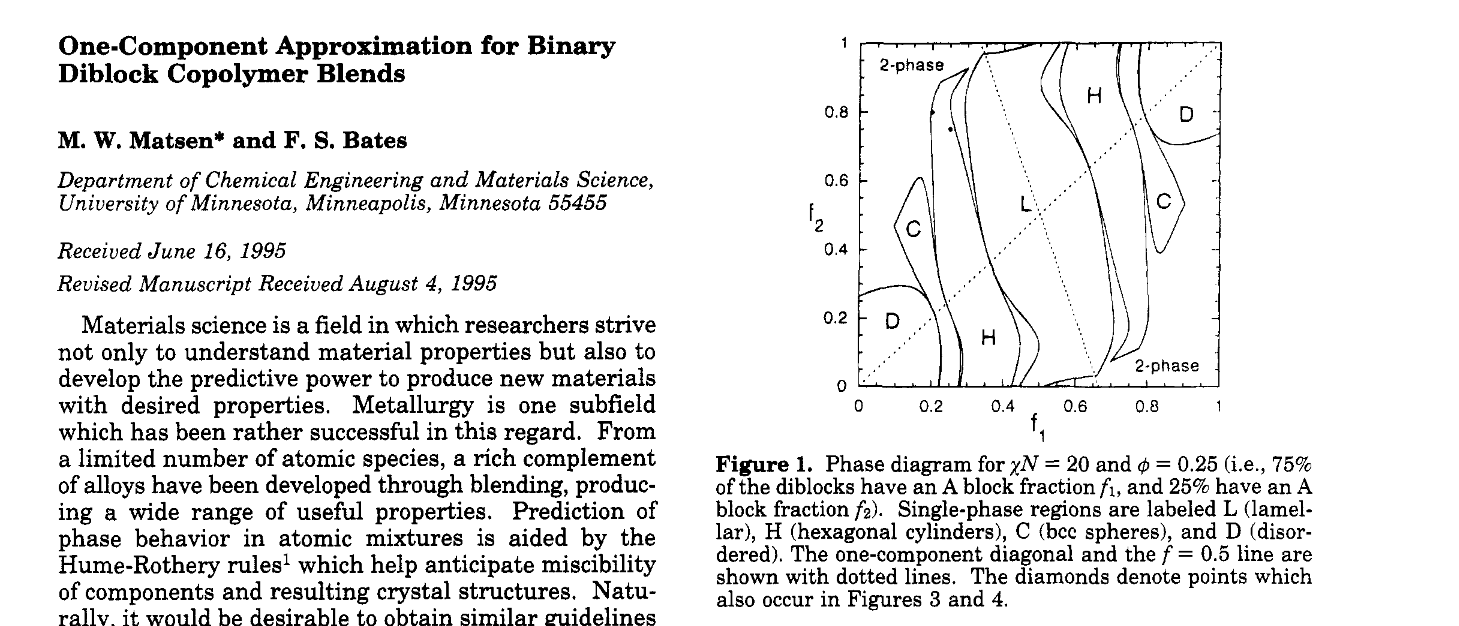

In [ ]:
np.arange(0, M+.1, 1)/M

In [ ]:
%%time

N = 1000
M = 20
N_m = N/M
n_p = 1
poly_type = "diblock"
b = 1

fa_array = np.arange(0, M+.1, 1)/M

CHI = 20/N

dens = [.75, .25]


lam_pnts = np.array([])
cyl_pnts = np.array([])
bcc_pnts = np.array([])
gyr_pnts = np.array([])
sq_cyl_pnts = np.array([])
sim_cub_pnts = np.array([])
fcc_pnts = np.array([])
dis_pnts = np.array([])

macro_pnts = np.array([])

for FA1 in fa_array:
    for FA2 in fa_array:
        FA1 = np.round(FA1, 3)
        FA2 = np.round(FA2, 3)
        poly1,d  =  poly_mat_gen(poly_type, M, n_p, FA1) 
        poly2,d  =  poly_mat_gen(poly_type, M, n_p, FA2)
        poly_mat = np.vstack((poly1, poly2))

    
        q_star = spinodal_gaus(poly_mat, dens, N_m, b, M)
        q_star = q_star[0]
#         print(q_star)
        if q_star <= 0.01: #macrophase sep
            point = np.array([FA1, FA2])
            macro_pnts = np.append(macro_pnts, point)
            
        else:
            lam_q = q_star*np.array([1, 0, 0])

            cyl_q1 = q_star*np.array([1, 0, 0])
            cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
            cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
            cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])

            bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
            bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
            bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
            bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
            bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
            bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])

            sq_6 = (1/np.sqrt(6)) * q_star
            gyr_q1 = sq_6*np.array([-1, 2, 1])
            gyr_q2 = sq_6*np.array([2, 1, -1])
            gyr_q3 = sq_6*np.array([1, -1, 2])
            gyr_q4 = sq_6*np.array([2, -1, -1])
            gyr_q5 = sq_6*np.array([-1, 2, -1])
            gyr_q6 = sq_6*np.array([-1, -1, 2])

            gyr_q7 = sq_6*np.array([2, 1, 1])
            gyr_q8 = sq_6*np.array([1, 2, 1])
            gyr_q9 = sq_6*np.array([1, 1, 2])
            gyr_q10 = sq_6*np.array([2, -1, 1])
            gyr_q11 = sq_6*np.array([1, 2, -1])
            gyr_q12 = sq_6*np.array([-1, 1, 2])

            sq_cyl_q1 = q_star * np.array([1,0,0])
            sq_cyl_q2 = q_star * np.array([0,1,0])

            sim_cub_q1 = q_star * np.array([1,0,0])
            sim_cub_q2 = q_star * np.array([0,1,0])
            sim_cub_q3 = q_star * np.array([0,0,1])

            fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
            fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
            fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
            fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])


            G3 = gamma3_E(poly_mat, dens, N_m, b, M, cyl_qs) # all g3s are eqivlaent
            lam_g3 = 0
            cyl_g3 = -(1/6) * (1/(3*np.sqrt(3))) * 12 * G3
            bcc_g3 = -(4/(3*np.sqrt(6))) * G3 #* gamma3_E(poly_mat, dens, N_m, b, M, np.array([bcc_q6, bcc_q3, -bcc_q1]))
            gyr_g3 = (1/6)  * (1/(12*np.sqrt(12))) * 48  * G3 #* gamma3_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
            sq_cyl_g3 = 0
            sim_cub_g3 = 0
            fcc_g3 = 0

            G4_00 = gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q, -lam_q, lam_q, -lam_q]))
            lam_g4 = (1/24) * (6) * (1) * G4_00#gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q, -lam_q, lam_q, -lam_q]))
            cyl_g4 = (1/12)* (G4_00 + \
                      4*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
            bcc_g4 = (1/24)* (G4_00 \
                             + 8*gamma4_E(poly_mat, dens, N_m, b, M, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                             + 2*gamma4_E(poly_mat, dens, N_m, b, M, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                             + 4*gamma4_E(poly_mat, dens, N_m, b, M, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
            gyr_g4 = (1/24)* (1/(12*12)) * (72*G4_00 + \
                               288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q8, -gyr_q8])) + \
                               288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q10, -gyr_q10])) + \
                               288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q11, -gyr_q11])) + \
                               144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q4, -gyr_q4])) + \
                               576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q12, -gyr_q12])) + \
                               -288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, gyr_q4, -gyr_q10, -gyr_q5])) + \
                               144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q2, gyr_q4, -gyr_q10])) + \
                               -288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q5, -gyr_q7, gyr_q2])))

            G4_90deg = gamma4_E(poly_mat, dens, N_m, b, M, np.array([sq_cyl_q1 , -sq_cyl_q1 , sq_cyl_q2 , -sq_cyl_q2 ]))
            sq_cyl_g4 = (1/24) * (1/4) * (12*G4_00 + \
                                          24*G4_90deg)
            sim_cub_g4 = (1/24) * (1/9) * (18*G4_00+ \
                                           72*G4_90deg)
            fcc_g4 = (1/24) * (1/16) * (24*G4_00\
                                        + 144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([fcc_q1, -fcc_q1, fcc_q2, -fcc_q2]))\
                                        - 48*gamma4_E(poly_mat, dens, N_m, b, M, np.array([-fcc_q1, fcc_q2, fcc_q3, fcc_q4])))

            lam_g2 = (1/2) * 2 * (1) * gamma2_E(poly_mat, dens, N_m, b, M, q_star, CHI)                
            cyl_g2 = lam_g2#(1/2) * 6 * (1/3) * gamma2_E(poly_mat, dens, N_m, b, M, q_star, CHI)
            bcc_g2 = lam_g2#(1/2) * 12 * (1/6) * gamma2_E(poly_mat, dens, N_m, b, M, q_star, CHI)
            gyr_g2 = lam_g2
            sq_cyl_g2 = lam_g2#(1/2) * (1/2) * 4 * gamma2_E(poly_mat, dens, N_m, b, M, q_star, CHI)
            sim_cub_g2 = lam_g2
            fcc_g2 = lam_g2


            amp_l1 = np.real((-3*lam_g3 - np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
            amp_l2 = np.real((-3*lam_g3 + np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
            amp_c1 = np.real((-3*cyl_g3 - np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
            amp_c2 = np.real((-3*cyl_g3 + np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
            amp_bcc1 = np.real((-3*bcc_g3 - np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
            amp_bcc2 = np.real((-3*bcc_g3 + np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
            amp_g1 = np.real((-3*gyr_g3 - np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
            amp_g2 = np.real((-3*gyr_g3 + np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
            amp_sq_c1 = np.real((-3*sq_cyl_g3 - np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
            amp_sq_c2 = np.real((-3*sq_cyl_g3 + np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
            amp_sim_cub1 = np.real((-3*sim_cub_g3 - np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
            amp_sim_cub2 = np.real((-3*sim_cub_g3 + np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
            amp_fcc1 = np.real((-3*fcc_g3 - np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))
            amp_fcc2 = np.real((-3*fcc_g3 + np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))

            lamF_1 = np.real(amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 )
            cylF_1 = np.real(amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 )
            bccF_1 = np.real(amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4)
            gyrF_1 = np.real(amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4)
            sq_cylF_1 = np.real(amp_sq_c1**2 * sq_cyl_g2 + amp_sq_c1**3 * sq_cyl_g3 + amp_sq_c1**4 * sq_cyl_g4 )
            sim_cubF_1 = np.real(amp_sim_cub1**2 * sim_cub_g2 + amp_sim_cub1**3 * sim_cub_g3 + amp_sim_cub1**4 * sim_cub_g4 )
            fccF_1 = np.real(amp_fcc1**2 * fcc_g2 + amp_fcc1**3 * fcc_g3 + amp_fcc1**4 * fcc_g4)

            lamF_2 = np.real(amp_l2**2 * lam_g2 + amp_l2**3 * lam_g3 + amp_l2**4 * lam_g4)
            cylF_2 = np.real(amp_c2**2 * cyl_g2 + amp_c2**3 * cyl_g3 + amp_c2**4 * cyl_g4 )
            bccF_2 = np.real(amp_bcc2**2 * bcc_g2 + amp_bcc2**3 * bcc_g3 + amp_bcc2**4 * bcc_g4)
            gyrF_2 = np.real(amp_g2**2 * gyr_g2 + amp_g2**3 * gyr_g3 + amp_g2**4 * gyr_g4)
            sq_cylF_2 = np.real(amp_sq_c2**2 * sq_cyl_g2 + amp_sq_c2**3 * sq_cyl_g3 + amp_sq_c2**4 * sq_cyl_g4)
            sim_cubF_2 = np.real(amp_sim_cub2**2 * sim_cub_g2 + amp_sim_cub2**3 * sim_cub_g3 + amp_sim_cub2**4 * sim_cub_g4 )
            fccF_2 = np.real(amp_fcc2**2 * fcc_g2 + amp_fcc2**3 * fcc_g3 + amp_fcc2**4 * fcc_g4)

            lamF = min(lamF_1, lamF_2)
            cylF = min(cylF_1, cylF_2)
            bccF = min(bccF_1, bccF_2)
            gyrF = min(gyrF_1, gyrF_2)
            sq_cylF = min(sq_cylF_1, sq_cylF_2)
            sim_cubF = min(sim_cubF_1, sim_cubF_2)
            fccF = min(fccF_1, fccF_2)

            point = np.array([FA1, FA2])
            minF = min([lamF, cylF, bccF, gyrF, sq_cylF, sim_cubF, fccF])
#             print("lamF", lamF)
#             print("cylF", cylF)
#             print("gyrF", gyrF)
#             print("bccF", bccF)
#             print(minF)
            if minF >= 0:
                dis_pnts = np.append(dis_pnts, point)
            elif minF == lamF:
                lam_pnts = np.append(lam_pnts, point) 
            elif minF == cylF:
                cyl_pnts = np.append(cyl_pnts, point)
            elif minF == bccF:
                bcc_pnts = np.append(bcc_pnts, point)
            elif minF == gyrF:
                gyr_pnts = np.append(gyr_pnts, point)
            elif minF == sq_cylF:
                sq_cyl_pnts = np.append(sq_cyl_pnts, point)
            elif minF == sim_cubF:
                sim_cub_pnts = np.append(sim_cub_pnts, point)
            elif minF == fccF:
                fcc_pnts = np.append(fcc_pnts, point)
            else:
                raise Exception("error in min F phase assignment")
    print("ONE FA1 BABES")

In [ ]:
np.arange(0,1,10)

In [ ]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)

ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl", color = "orange")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2], label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam", color = "blue")
ax.scatter(macro_pnts[::2], macro_pnts[1::2], label = "macro", color = "black", marker = "x")

ax.plot(np.arange(0,1,.01), np.arange(0,1,.01), linestyle = "--", color = "black", alpha = 0.5)

clr = "black"
ax.plot([0, 0.1], [0.3, 0.3], color = clr, label = "matsen 2-phase")
ax.plot([0.1, 0.1], [0.3, 0.6], color = clr)
ax.plot([0.1, 0.2], [0.6, 0.6], color = clr)
ax.plot([0.2, 0.2], [0.6, 0.9], color = clr)
ax.plot([0.2, 0.3], [0.9, 0.9], color = clr)
ax.plot([0.3, 0.3], [0.9, 1], color = clr)


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_ylabel("$f_A^{(2)}$")
ax.set_xlabel("$f_A^{(1)}$")
ax.set_title("diblock phase diagram, $\chi N$ = 20, $\phi_1 = 0.75, \phi_2 = 0.25$  N = " + str(N) )

In [ ]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)



ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl", color = "orange")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2], label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam", color = "blue")
ax.scatter(macro_pnts[::2], macro_pnts[1::2], label = "macro", color = "black", marker = "x")

In [ ]:
# class Mix:
#     def __init__(self, poly_mat, dens, M_arr, N_m, b):
#         self.poly_mat = poly_mat
#         self.dens = dens
#         self.M_arr = M_arr
#         self.N_m = N_m
#         self.b = b
#         self.n_p = len(dens)
#         self.M_max = max(M_arr)
#         if len(dens) != len(M_arr):
#             raise Exception("dens and M_arr not same length")

#         N = 0
#         for i in range(len(M_arr)):
#             m = M_arr[i]
#             phi = dens[i]
#             N += (m * N_m * phi)
#         self.N = N

#         # find poly with largest M
#         # pad all other polys with monomer type 2
#         # then repackage as poly_mat_padded
#         M_max = max(self.M_arr)
#         poly_mat_padded = []
#         for i, poly in enumerate(poly_mat):
#             M_p = M_arr[i]
#             if M_p < M_max:
#                 new_poly = poly + [2]*(M_max - M_p)
#                 poly_mat_padded.append(new_poly)
#             else:
#                 poly_mat_padded.append(poly)

#         self.poly_mat_padded = poly_mat_padded
        
#         #need to calculate each monomer matrix explicitly to handle length polydispersity correctly
#         self.M2s = [self.calc_monomer_matrix([0,0]), self.calc_monomer_matrix([0,1])\
#                     , self.calc_monomer_matrix([1,0]), self.calc_monomer_matrix([1,1])]
#         self.M2_inds = ["AA", "AB", "BA", "BB"]
        
#         self.M3s = [self.calc_monomer_matrix_3([0,0,0]), self.calc_monomer_matrix_3([0,0,1]),\
#                    self.calc_monomer_matrix_3([0,1,0]), self.calc_monomer_matrix_3([1,0,0]), \
#                    self.calc_monomer_matrix_3([0,1,1]), self.calc_monomer_matrix_3([1,0,1]), \
#                    self.calc_monomer_matrix_3([1,1,0]), self.calc_monomer_matrix_3([1,1,1])]
#         self.M3_inds = ["AAA", "AAB", "ABA", "BAA", "ABB", "BAB",  "BBA", "BBB"]
        
#         self.M4s =[self.calc_monomer_matrix_4([0,0,0,0]), self.calc_monomer_matrix_4([0,0,0,1]),\
#                    self.calc_monomer_matrix_4([0,0,1,0]), self.calc_monomer_matrix_4([0,1,0,0]),\
#                    self.calc_monomer_matrix_4([1,0,0,0]), self.calc_monomer_matrix_4([0,0,1,1]),\
#                    self.calc_monomer_matrix_4([1,1,0,0]), self.calc_monomer_matrix_4([1,0,0,1]),\
#                    self.calc_monomer_matrix_4([0,1,1,0]), self.calc_monomer_matrix_4([1,0,1,0]),\
#                    self.calc_monomer_matrix_4([0,1,0,1]), self.calc_monomer_matrix_4([1,1,1,0]),\
#                    self.calc_monomer_matrix_4([1,1,0,1]), self.calc_monomer_matrix_4([1,0,1,1]),\
#                    self.calc_monomer_matrix_4([0,1,1,1]), self.calc_monomer_matrix_4([1,1,1,1]),]
#         self.M4_inds = ["AAAA, AAAB, AABA, ABAA, BAAA, AABB, BBAA, BAAB, ABBA, BABA, ABAB, BBBA, BBAB, BABB, ABBB, BBBB"]
        
#         self.q_star = self.spinodal_gaus()#poly_mat, dens, N_m, b, M, M_arr)

#     def calc_monomer_matrix(self, alphas):
#         # calculates the alpha1 alpha2 monomer identity cross correlation matrix
#         # assumes all polymers consist of monomers with the same length N_m

#         #polymat - each row is a polymer
#         #dens is an array where each entry is rel vol frac of correponding polymer
#         #lenght_arr - M of each corresponding polymer in poly_mat
# #         poly_mat = np.array(poly_mat)

#         epsilon = 0.00001
#         if not ((np.sum(dens) + epsilon > 1) and (np.sum(dens) - epsilon < 1)):
#             raise Exception("polymer volumer fractions do not sum to one")
#         if len(self.M_arr) == 1: #single poly
#             n_p = 1
#             M = len(self.poly_mat)

#             alph1 = [alphas[0]]*M#np.zeros(M)
#             alph2 =[alphas[1]]*M#np.zeros(M)
#             sig1 = 1*(self.poly_mat == alph1)
#             sig2 = 1*(self.poly_mat == alph2)
#             M2 = np.outer(sig1, sig2)
#             return M2

#         if alphas[0] == 0:
#             alph1 =np.zeros((self.n_p, self.M_max))
#         elif alphas[0] == 1:
#             alph1 =np.ones((self.n_p, self.M_max))

#         if alphas[1] == 0:
#             alph2 =np.zeros((self.n_p, self.M_max))
#         elif alphas[1] == 1:
#             alph2 =np.ones((self.n_p, self.M_max))                

#         #extend dens into n_pxM matrix
#         poly_weights = (np.ones((self.n_p, self.M_max)).T * self.dens).T

#         #multiply sigams by density of each polymer
#         sigma1 = 1*((self.poly_mat_padded == alph1))#.sum(axis = 0) #sigma. could multiply each
#         sigma2 = 1*((self.poly_mat_padded == alph2))#.sum(axis = 0)

#         #need to do each row outer product with corresponding row, get n_p MxM matrices, then sum the results
#         prods = np.einsum('bi,bo->bio', sigma1*poly_weights, sigma2) # performing row wise cross product (each poly contribution)
#         M2 = np.sum(prods, axis = 0)#           ^^^^ averaging each contribution
#         return M2
    
#     def calc_monomer_matrix_3(self, alphas):
#         # calculates the alph1 aph2 alph3 monomer identity cross correlation matrix
#         # assumes all polymers consist of monomers with the same length N_m

#         # polymat - each row is a polymer
#         # dens is an array where each entry is rel vol frac of correponding polymer

#         if self.n_p == 1: # single poly
#             n_p = 1
#             M = len(self.poly_mat)
#             alph1 = [alphas[0]]*M #np.zeros(M)
#             alph2 = [alphas[1]]*M #np.zeros(M)
#             alph3 = [alphas[2]]*M #np.zeros(M)
#             sig1 = 1*(self.poly_mat == alph1)
#             sig2 = 1*(self.poly_mat == alph2)
#             sig3 = 1*(self.poly_mat == alph3)
#             M3_AAA = np.einsum('i,j,k',sig1,sig2,sig3)
#             return M3_AAA

#         if alphas[0] == 0:
#             alph1 =np.zeros((self.n_p, self.M_max))
#         elif alphas[0] == 1:
#             alph1 =np.ones((self.n_p, self.M_max))

#         if alphas[1] == 0:
#             alph2 =np.zeros((self.n_p, self.M_max))
#         elif alphas[1] == 1:
#             alph2 =np.ones((self.n_p, self.M_max))     

#         if alphas[2] == 0:
#             alph3 =np.zeros((self.n_p, self.M_max))
#         elif alphas[2] == 1:
#             alph3 =np.ones((self.n_p, self.M_max)) 

#         #extend dens into n_pxM matrix
#         poly_weights = (np.ones((self.n_p, self.M_max)).T * self.dens).T

#         #multiply sigams by density of each polymer
#         sigma1 = 1*((self.poly_mat_padded == alph1))#.sum(axis = 0) #sigma. could multiply each
#         sigma2 = 1*((self.poly_mat_padded == alph2))#.sum(axis = 0)
#         sigma3 = 1*((self.poly_mat_padded == alph3))

#         #need to do each row outer product with corresponding row, get n_p MxMxM matrices, then sum the results
#         prods = np.einsum('bi,bo,bn->bion', sigma1*poly_weights, sigma2, sigma3) # performing row wise cross product (each poly contribution)
#         M3 = np.sum(prods, axis = 0)#           ^^^^ averaging each contribution
#         return M3

#     def calc_monomer_matrix_4(self, alphas):
#         # calculates the 4pnt monomer identity cross correlation matrix
#         # assumes all polymers have monomer of same length N_m

#         if self.n_p == 1: # single poly
#             n_p = 1
#             M = len(poly_mat)
#             alph1 = [alphas[0]]*M #np.zeros(M)
#             alph2 = [alphas[1]]*M #np.zeros(M)
#             alph3 = [alphas[2]]*M #np.zeros(M)
#             alph4 = [alphas[3]]*M #np.zeros(M)

#             sig1 = 1*(self.poly_mat == alph1)
#             sig2 = 1*(self.poly_mat == alph2)
#             sig3 = 1*(self.poly_mat == alph3)
#             sig4 = 1*(self.poly_mat == alph3)

#             M4 = np.einsum('i,j,k,l',sig1,sig2,sig3,sig4)
#             return M4

#         if alphas[0] == 0:
#             alph1 =np.zeros((self.n_p, self.M_max))
#         elif alphas[0] == 1:
#             alph1 =np.ones((self.n_p, self.M_max))

#         if alphas[1] == 0:
#             alph2 =np.zeros((self.n_p, self.M_max))
#         elif alphas[1] == 1:
#             alph2 =np.ones((self.n_p, self.M_max))     

#         if alphas[2] == 0:
#             alph3 =np.zeros((self.n_p, self.M_max))
#         elif alphas[2] == 1:
#             alph3 =np.ones((self.n_p, self.M_max)) 

#         if alphas[3] == 0:
#             alph4 =np.zeros((self.n_p, self.M_max))
#         elif alphas[3] == 1:
#             alph4 =np.ones((self.n_p, self.M_max)) 

#         #extend dens into n_pxM matrix
#         poly_weights = (np.ones((self.n_p, self.M_max)).T * self.dens).T

#         #multiply sigams by density of each polymer
#         sigma1 = 1*((self.poly_mat_padded == alph1))#.sum(axis = 0) #sigma. could multiply each
#         sigma2 = 1*((self.poly_mat_padded == alph2))#.sum(axis = 0)
#         sigma3 = 1*((self.poly_mat_padded == alph3))
#         sigma4 = 1*((self.poly_mat_padded == alph4))

#         #need to do each row outer product with corresponding row, get n_p MxMxM matrices, then sum the results
#         prods = np.einsum('bi,bo,bn,bm->bionm', sigma1*poly_weights, sigma2, sigma3, sigma4) # performing row wise cross product (each poly contribution)
#         M4 = np.sum(prods, axis = 0) #           ^^^^ averaging each contribution
#         return M4

#     def spinodal_gaus(self):
#         chi = 0
#         K0 = 1/np.sqrt(self.N*(self.b**2))

#         KS = optimize.fmin(lambda K: np.real(self.gamma2_E(K, chi)), K0,\
#                           disp=False)

#         return KS

#     def gamma2_E(self, k, chi):
#         s2_inv = self.calc_sf2_inv(k)

#         D = [1,-1]    # sign indicator
#         G = 0
#         for I0, I1 in product([0,1], repeat=2):
#             G += s2_inv[I0, I1]*D[I0]*D[I1]

#         return -2*chi + self.N*G

#     def calc_sf2_inv(self, k_vec):
#         if np.linalg.norm(k_vec[0]) < 1e-5:
#             s2 = np.ones((2,2),dtype='complex')
#             return s2/self.N**2 # s2[0][0]/(N**2), s2[0][1]/(N**2), s2[1][1]/(N**2)
#         (S2_AA_arr, S2_AB_arr, S2_BA_arr, S2_BB_arr) = self.calc_sf2(k_vec)
#         det = S2_AA_arr * S2_BB_arr - (S2_AB_arr*S2_BA_arr)
#         S2_AA_inv = S2_BB_arr * (1/det)
#         S2_AB_inv = -S2_AB_arr * (1/det)
#         S2_BA_inv = -S2_BA_arr * (1/det)
#         S2_BB_inv = S2_AA_arr * (1/det)

#         s2inv = np.zeros((2,2))
#         s2inv[0][0] = S2_AA_inv[0]
#         s2inv[0][1] = S2_AB_inv[0]
#         s2inv[1][0] = S2_BA_inv[0]
#         s2inv[1][1] = S2_BB_inv[0]
#         return s2inv#(S2_AA_inv, S2_AB_inv, S2_BB_inv)

#     def calc_sf2(self, k_vec):
#         M2_AA, M2_AB, M2_BA, M2_BB = self.M2s
#         nk = len(k_vec)

#         grid = np.indices((self.M_max, self.M_max))
#         j1 = grid[0]
#         j2 = grid[1]

#         S2_AA_arr = np.zeros(nk)
#         S2_AB_arr = np.zeros(nk)
#         S2_BA_arr = np.zeros(nk)
#         S2_BB_arr = np.zeros(nk)
#         for i, k in enumerate(k_vec):
#             C = np.zeros((M, M))
#             k = np.linalg.norm(k)
#             x_m = (1/6) * N_m * b**2 * k**2

#             #j1 = j2, s1 > s2
#             index = (j1 == j2)
#             constant = 1
#             debye = (2/(x_m**2)) * (x_m + np.exp(-x_m) - 1) 

#             C[np.where((index) != 0)] += debye

#             #j1 > j2, s1 s2 any
#             index = (j1 > j2)
#             constant = np.exp(-x_m*(j1-j2))
#             integral = (1/(x_m**2)) * (np.exp(x_m) + np.exp(-x_m) - 2) #for off-diagonal terms

#             C[np.where((index) != 0)] += constant[np.where(index != 0)] \
#                                         * integral

#             #j2 > j1, s1 s2 any
#             index = (j2 > j1)
#             constant = np.exp(-x_m*(j2-j1))
#     #         integral is the same

#             C[np.where((index) != 0)] += constant[np.where(index != 0)] \
#                                         * integral   
#     #         print(C/M**2)
#             S2_AA_arr[i] = np.sum((1/M**2) * C * M2_AA)
#             S2_AB_arr[i] = np.sum((1/M**2) * C * M2_AB)
#             S2_BA_arr[i] = np.sum((1/M**2) * C * M2_BA)
#             S2_BB_arr[i] = np.sum((1/M**2) * C * M2_BB)
#         return S2_AA_arr*self.N**2, S2_AB_arr*self.N**2, S2_BA_arr*self.N**2, S2_BB_arr*self.N**2